# Narrative Flow of Men and Women



 ### Hypothesis:

Solidarity and social relations were different in the men and women sections of Birkenau; men and women recall them in different ways and in different context; solidarity and social bonds have different place in the narratives of men and women.

If the hypothesis is true:
- the story line (or narrative flow) leading to the discussion of sociability and solidarity is different in testimonies of men and women; the most likely sequences of topics (to be named narrative pathway) leading to topics describing solidarity and sociability are different
- different amount of traffic is going through  similar pathways leading to solidarity and sociability
- either different nodes (to be named priming topics) are preceding and following (to be named exit topics) topics of solidarity and sociability or if they are similar transitions to them happen at different intensitiy


Key research questions to be studied here:
- What are the major pathways between the memory of arrival to Birkenau and leaving from Birkenau?
- How are nodes related to solidarity (food sharing, aid giving) and social bonds (friends, social bonds, family) are situated along the major pathways? For women and men, are they peripheral or central? I.e. do a significant amount of narrative flow go towards them for men and women?
- What are the exit and priming topics for solidarity (food sharing, aid giving) and social bonds for men and women? What are those topics that prime them?
- How are topics of solidarity and social bonds related to survival explanations?
- How is friendship related to aid giving for men and for women? What are the transitory topics between them?
- Where did solidarity take place? In what contexts did solidarity take place?



## Summary of observations

In the dataset we can observe two general trends about the way women and men discuss acts of solidarity and social bonds.

Trend 1:

Both men and women discuss aid giving in the context of camp living conditions and forced labour. 

However, aid giving is more likely to follow living conditions for women than for men;(aid giving is more likely to follow forced labor for men than for women. This is supported by Observation 1).

The same can be observed with food sharing. Women rather discuss food sharing following living conditions, and men tend to discuss it following forced labour. (Supported by Observation 3).

Similarly, women tend to discuss friendship following living conditions more than men do. (Supported by Observation 5). Men tend to discuss friendship following forced labor more than women do. (Supported by Observation 5).

We can observe a similar pattern with social relations; women discuss it following living conditions whereas men following forced labor. (Supported by Observation 5 A).

Women are also more likely to connect preferential treatment with living conditions than men (Supported by Observation 24 A)

The trend that women are more likely to connect the living environment with social activity and solidarity than men is becoming much more stronger when we compare those men and women who did not work (supported by Observation 14, 14 A. and 14 B).

At the same time, social relations and friends remain more connected with forced labour for men who worked(supported by Observation 18). By contrast, in the narrative of women, friends and living conditions are more connected (supported by Observation 18A)

Men who worked are more likely to discuss food sharing in the context of forced labor than women; men who worked are more likely to discuss aid giving in the context of forced labor than women;(supported by Observation 21).

As a whole, women are more likely to discuss social activity and acts of solidarity in the context of living environment, whereas men in the context of forced labour. All this suggests that in women's barracks more social life and acts of solidarity took place thank in men barracks; by contrast men were more likely to experience solidarity and social bonds during forced labour and less in the living environment.

The fact that the social dynamics was different in the living environment of women and men is also supported by the following observation. Women are much more likely to connect the living environment with preferential treatment (Observation 24 A).

Trend 2.

Both women and men discuss solidarity and social bonds in the context of survival explanations.

However, women are more likely to connect social relations and aid giving (involving social relations, selection, friends in-between steps)  with survivor explanations. (Supported by Observation 8).

Social relations include also the Blockalteste; women are more likely to connect Blockalteste with survival explanations (supported by Observation 24).

Women who did not work are more likely to connect friendship and social relations with survival explanations (supported by Observation 13). 

Women are particularly more likely to attribute their survival of selections to social relations, friends and aid giving (supported by Observation 9).

In summary, social relations and acts of solidarity have larger weight in narrative paths leading to survival explanations for women. This signals  that women are more likely to attribute their survival to solidarity and social bonds. Again, this suggest that solitary and social bonds were more prevalent in the women sections.

## Load the necessary libraries and set up paths

In [1]:
import constants
import pandas as pd
import os
from IPython.display import display
import json
import pyemma
from tables import *
import sys; sys.path.insert(0, '..')
from markov_modelling.markov_utils import *
from collections import Counter
#from varname.helpers import Wrapper

In [2]:
input_directory = constants.output_data_markov_modelling
path = os.getcwd()
parent = os.path.abspath(os.path.join(path, os.pardir))
input_directory = parent +'/'+ constants.output_data_markov_modelling

## Load the relevant data

Load the complete women and men data 

In [3]:
data_set_1_w  = pyemma.load(input_directory+'complete_w'+'/'+'pyemma_model','simple')
data_set_1_complete  = pyemma.load(input_directory+'complete'+'/'+'pyemma_model','simple')
data_set_1_m = pyemma.load(input_directory+'complete_m'+'/'+'pyemma_model','simple')
data_set_1_complete = pyemma.load(input_directory+'complete'+'/'+'pyemma_model','simple')

Load the stationary probabilities

In [4]:
stationary_probs = pd.read_csv(input_directory+'/'+'complete'+'/'+'stationary_probs.csv')

Load data representing men and women who worked

In [5]:
data_set_1_w_work  = pyemma.load(input_directory+'work_w'+'/'+'pyemma_model','simple')
data_set_1_m_work = pyemma.load(input_directory+'work_m'+'/'+'pyemma_model','simple')

Load data representing men and women who did not  work

In [6]:
data_set_1_w_not_w  = pyemma.load(input_directory+'notwork_w'+'/'+'pyemma_model','simple')
data_set_1_m_not_w = pyemma.load(input_directory+'notwork_m'+'/'+'pyemma_model','simple')

Load the state index

In [7]:
features_df = pd.read_csv(parent+'/'+constants.segment_keyword_matrix_feature_index)

## Create functions for frequently used operations

### Calculate first mean passage time function

In [8]:
def calculate_mfpt(mm,source,target,topic_labels):
    source_indices = []
    for element in source:
        source_index_full = topic_labels.index(element)
        source_index_active = mm._full2active[source_index_full]
        source_indices.append(source_index_active)
    target_indices = []
    for element in target:
        target_index_full = topic_labels.index(element)
        target_index_active = mm._full2active[target_index_full]
        target_indices.append(target_index_active)
    print (source_indices)
    mfpt = pyemma.msm.tpt(mm,source_indices,target_indices).mfpt
    print (mfpt)

### Print paths functions

In [9]:
def print_paths(flux_w,max_length=None):
    for path in flux_w:
        if max_length is not None:
            if len(path.split('-'))<=max_length:
                print (path + ':' + str(flux_w[path]))
                print ('\n')
        else:
            print (path + ':' + str(flux_w[path]))
            print ('\n')

In [10]:
def print_similar_paths(flux_w,flux_m,max_length=None,show=True):
    all_paths = []
    for path in flux_w:
        if max_length is not None:
            if len(path.split('-'))<=max_length:
                all_paths.append(path)
        else:
            all_paths.append(path)
    for path in flux_m:
        if max_length is not None:
            if len(path.split('-'))<=max_length:
                all_paths.append(path)
        else:
            all_paths.append(path)
    counts = Counter(all_paths)

    dup_paths = [path for path in all_paths  if counts[path] > 1]
    dup_paths = set(dup_paths)
    if show:
        for path in dup_paths:
            print (path)
            print ('Women: '+str(flux_w[path]))
            print ('Men: '+str(flux_m[path]))
            print ('\n')
    else:
        result = []
        for path in dup_paths:
            
            result.append([path,flux_w[path],flux_m[path]])
        return result


In [11]:
from tqdm.notebook import trange, tqdm
def identify_paths_with_substantial_difference(states,model_1,model_2,ratio=1.5):
    
    flux = 0.6
    
    for i in trange(len(states)):
        story_start = states[i]
        for target in states:
            try:
                if target == story_start:
                    continue
                else:
                    story_end = target
                    flux_1 = calculate_flux(model_1,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

                    flux_2 = calculate_flux(model_2,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
                    result=print_similar_paths(flux_1,flux_2,max_length=3,show=False)
                    for element in result:
                        if ((element[1]/element[2])>ratio) or ((element[2]/element[1])>ratio):
                            print (element[0])
                            print (element[1])
                            print (element[2])
            except:
                pass

In [12]:
def get_inoutgoing_probabilities(msm, central_topics, context_topics, n_lag=1, reduce_to_active=False):
    """
    Compute cumulative probabilities from a context of topics into and out of a central topic.
    
    :param msm: pyemma.msm.MarkovStateModel
    :param central_topics: list of topics at the "center", to evaluate incoming and outgoing probablity from/to
    :param context_topics: list of topics to consider as start/end states into which/from which probability to
    central_topics is computed
    :param n_lag: int for transition matrix power (time step of output)
    :param reduce_to_active: bool; if True, reduces context_topics to the subset that is in the active set.
    """

    # get indices
    idx_context = features_df[features_df.KeywordLabel.isin(context_topics)].index
    idx_central = features_df[features_df.KeywordLabel.isin(central_topics)].index
    
    # check that central topic is in active set:
    assert np.all(np.in1d(idx_central, msm.active_set))
    
    # either check if the same is true for context topics or reduce them to the sub-set that is in active set
    if not reduce_to_active:
        assert np.all(np.in1d(idx_context, msm.active_set)), 'not in active set' + str(np.array(context_topics)[~np.in1d(idx_context, msm.active_set)])
    else:
        idx_context = idx_context[np.in1d(idx_context, msm.active_set)]
        
    # map indices to msm active set
    idx_context = msm._full2active[idx_context]
    idx_central = msm._full2active[idx_central]

    # matrix-power the transition matrix to estimate transition probabilities for higher lag times
    t = np.linalg.matrix_power(msm.transition_matrix, n_lag)
    
    # probability of following state is computed from transition matrix row
    out_prob = t[np.ix_(idx_central, idx_context)].sum()
    
    # probability of last state is computed from row-normalized transposed transition matrix
    t_t = t.T / t.T.sum(axis=1, keepdims=True)
    assert msmtools.analysis.is_transition_matrix(t_t)
    
    in_prob = t_t[np.ix_(idx_central, idx_context)].sum()
    return in_prob, out_prob

def plot_inoutgoing_probabilities(probs_w, probs_m, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    lbls = ['preceding','following']
    linestyles = ['-', ':']
    numerator = 0
    for _pw, _pm, lbl, linestyle in zip(probs_w.T, probs_m.T, lbls, linestyles):
        print (numerator)
        if numerator == 0:
            numerator = numerator +1
            continue
        ax.plot(_msmlags, _pw, 'r'+linestyle,label='women',c="#ff7f0e")
        ax.plot(_msmlags, _pm, 'b'+linestyle,label='men', c="#1f77b4")
    ax.legend()
    ### unit is only minutes if MSM lagtime is 1
    ax.set_ylim(ymin=0,ymax=0.2)
    ax.set_xlabel('lag time (minutes)')
    ax.set_ylabel('(cumulative) probability')

### Load  the topic map

In [13]:
topic_map_directory = parent +'/'+constants.input_directory
topic_map = pd.read_csv(topic_map_directory+'feature_map_no_friends_no_food_sharing.csv')
topic_map_living_conditions = topic_map[topic_map['CoverTerm']=="living conditions"].KeywordLabel.to_list()

topic_map_living_condition = []
for element in topic_map[topic_map['CoverTerm']=="living conditions"].KeywordLabel.to_list():
    if 'camp' in element:
        topic_map_living_condition.append(' '.join(element.split(' ')[1:]))
    else:
        topic_map_living_condition.append(element)

In [14]:
topic_map_forced_labor = topic_map[topic_map['CoverTerm']=="forced labor"].KeywordLabel.to_list()

In [15]:
topic_map_forced_labor = [
 'farms',
 'forced labor',
 'forced labor companies',
 'forced labor conditions',
 'forced labor squads',
 'working life']

## Observation 1

### Qualitative description

Both men and women discuss aid giving in the following camp living conditions and forced labour, women are more likely to discuss it following camp living conditions. While men are more likely to discuss it following forced labour. 

For instance, the following pathway is present in both men and women testimonies but in testimonies of women (3.3%), more traffic is going through it than in testimonies of men(2%):

arrival-selections-intake procedures-living conditions-aid giving

Furthermore, the amount of traffic going through the following path is different for men (2.8) and women (4.4%) :

living conditions-aid giving

Similarly, more traffic is going through the following path for women (3 %) and men (0.8%):

living conditions-food-aid giving

Finally, when the direct path between forced labor and aid giving is examined then in case of men (11.357897171905313) more traffic is going than in case of women (9%):

forced labor-aid giving

### Quantitative evidence 1

In [16]:
story_start = 'arrival'
story_end = 'aid giving'
state_index = features_df.KeywordLabel.to_list()
flux = 1

In [17]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [18]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Print those paths where living conditions prime aid giving for women

In [19]:
result = []

for path in flux_w:
    # Get the state before end state
    penultimate_state = path.split('-')[-2]
    if penultimate_state in topic_map_living_condition:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

arrival-selections-camp procedures-living conditions-aid giving
7.844370464005152




Print the total amount of traffic going through these nodes

In [20]:
print (np.array(result).sum())

7.844370464005152


Print those paths where living conditions prime aid giving for men

In [21]:
result = []

for path in flux_m:
    # Get the state before end state
    penultimate_state = path.split('-')[-2]
    if penultimate_state in topic_map_living_condition:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])

arrival-selections-camp procedures-living conditions-aid giving
5.219334336327136




Print the total amount of traffic going through these nodes

In [22]:
print (np.array(result).sum())

5.219334336327136


Print those paths where forced labor prime aid giving for women

In [23]:
result = []

for path in flux_w:
    penultimate_state = path.split('-')[-2]
    if penultimate_state in topic_map_forced_labor:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

arrival-camp procedures-living conditions-forced labor-aid giving
6.47587899433361


arrival-separations-camp procedures-tattoo-forced labor-aid giving
0.8393512845998248




Print the total amount of traffic going through these nodes

In [24]:
print (np.array(result).sum())

7.315230278933434


Print those paths where forced labor prime aid giving for men

In [25]:
result = []

for path in flux_m:
    penultimate_state = path.split('-')[-2]
    if penultimate_state in topic_map_forced_labor:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])

arrival-selections-camp procedures-tattoo-forced labor-aid giving
6.993051522025842


arrival-separations-camp procedures-living conditions-forced labor-aid giving
2.6924459659038686




Print the total amount of traffic going through these nodes

In [26]:
print (np.array(result).sum())

9.68549748792971


### Visualization

7 labels to show
9 labels to show


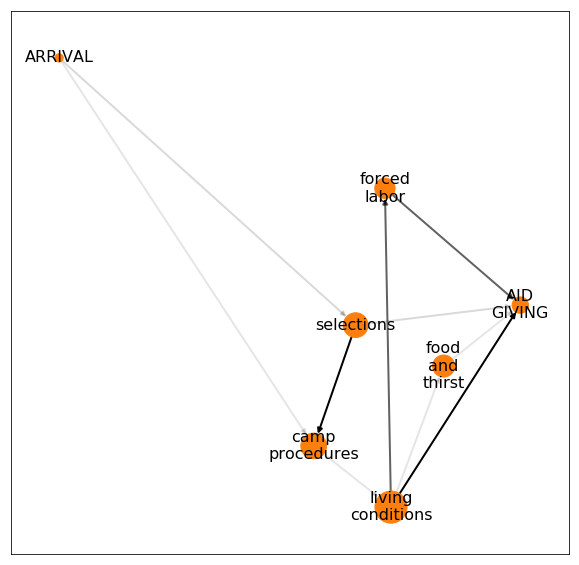

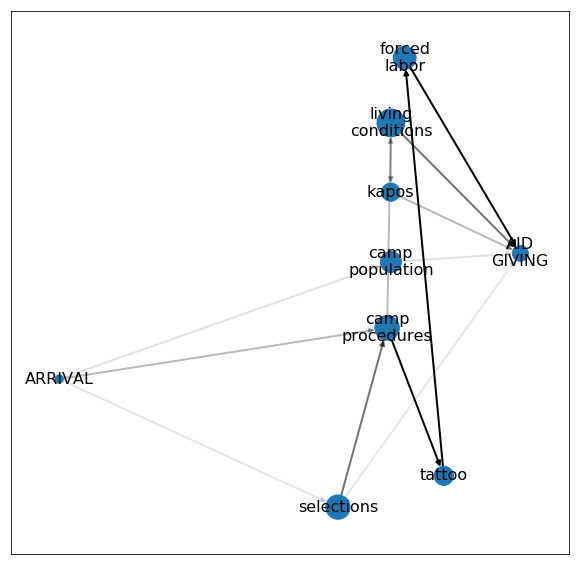

In [27]:
flux = 0.22
story_start = 'arrival'
story_end = 'aid giving'
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None,gender="w")
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None,gender="m")

### Quantitative evidence 2

In [28]:
story_start = 'living conditions'
story_end = 'aid giving'
state_index = features_df.KeywordLabel.to_list()

In [29]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.6)

In [30]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.6)

Print the most important pathways for women

In [31]:
print_paths(flux_w,max_length=3)

living conditions-aid giving:9.799882454268145


living conditions-forced labor-aid giving:5.845094292414126


living conditions-food and thirst-aid giving:4.8380937507624315


living conditions-selections-aid giving:4.409738783142708


living conditions-kapos-aid giving:3.8821224702907986


living conditions-camp population-aid giving:3.7189107276453264


living conditions-family-aid giving:3.212080347560529


living conditions-perpetrators-aid giving:2.860771221633108


living conditions-mass murder-aid giving:2.8587948002721855


living conditions-adaptation methods-aid giving:2.7602561650651016


living conditions-social bonds-aid giving:2.6433856005319374


living conditions-transfer-aid giving:2.2706111971774097


living conditions-departure-aid giving:2.2081159148436513


living conditions-violence-aid giving:1.9758994808001413


living conditions-Appell-aid giving:1.9638303309058236


living conditions-clothing-aid giving:1.7433125788808341




Print the most important pathways for men

In [32]:
print_paths(flux_m,max_length=3)

living conditions-aid giving:6.841289575734247


living conditions-forced labor-aid giving:6.585111260351911


living conditions-camp population-aid giving:4.469531497434354


living conditions-kapos-aid giving:4.176981918470401


living conditions-food and thirst-aid giving:3.315605954938037


living conditions-adaptation methods-aid giving:3.2237665956646553


living conditions-selections-aid giving:3.0449639542613083


living conditions-mass murder-aid giving:2.848828192743447


living conditions-departure-aid giving:2.7986487559011772


living conditions-camp procedures-aid giving:2.47426113838945


living conditions-transfer-aid giving:2.157748654030091


living conditions-social bonds-aid giving:2.1130458038085767


living conditions-family-aid giving:2.1071970820927626


living conditions-violence-aid giving:1.9588007653972725


living conditions-perpetrators-aid giving:1.715389429089451


living conditions-clothing-aid giving:1.3678447802213576


living conditions-Appell-aid gi

Print similar pathways

In [33]:
print_similar_paths(flux_w,flux_m)

living conditions-adaptation methods-aid giving
Women: 2.7602561650651016
Men: 3.2237665956646553


living conditions-kapos-aid giving
Women: 3.8821224702907986
Men: 4.176981918470401


living conditions-Appell-aid giving
Women: 1.9638303309058236
Men: 1.258266588322604


living conditions-food and thirst-aid giving
Women: 4.8380937507624315
Men: 3.315605954938037


living conditions-family-aid giving
Women: 3.212080347560529
Men: 2.1071970820927626


living conditions-violence-aid giving
Women: 1.9758994808001413
Men: 1.9588007653972725


living conditions-aid giving
Women: 9.799882454268145
Men: 6.841289575734247


living conditions-selections-aid giving
Women: 4.409738783142708
Men: 3.0449639542613083


living conditions-social bonds-aid giving
Women: 2.6433856005319374
Men: 2.1130458038085767


living conditions-forced labor-aid giving
Women: 5.845094292414126
Men: 6.585111260351911


living conditions-mass murder-aid giving
Women: 2.8587948002721855
Men: 2.848828192743447


living

### Visualize

4 labels to show
5 labels to show


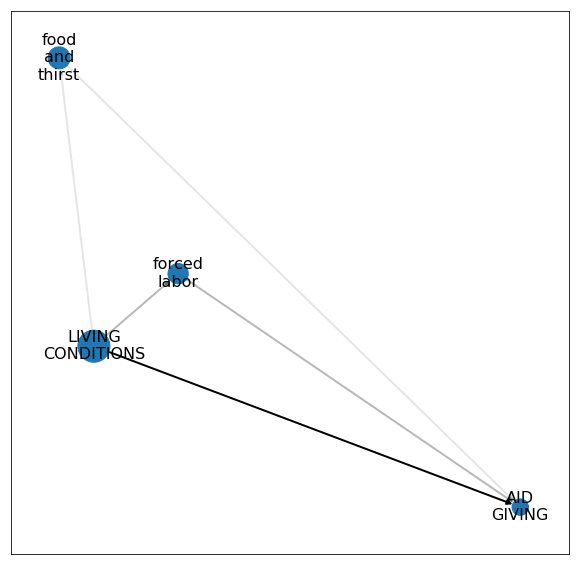

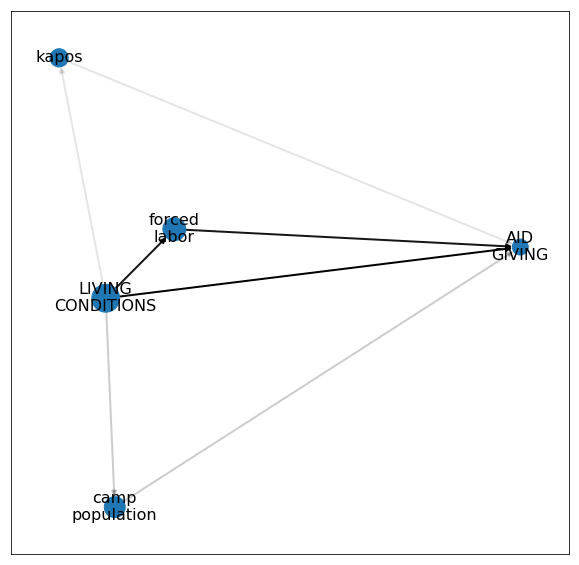

In [34]:
flux=0.2
story_start = 'living conditions'
story_end = 'aid giving'
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 2

In [35]:
story_start = 'forced labor'
story_end = 'aid giving'
state_index = features_df.KeywordLabel.to_list()

In [36]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.8)

In [37]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.8)

Print most important path for women

In [38]:
print_paths(flux_w,max_length=2)

forced labor-aid giving:12.306467335516322




Print most important path for men

In [39]:
print_paths(flux_m,max_length=2)

forced labor-aid giving:14.609443107673867




### Quantitative evidence 3

Aid giving is more likely to follow forced labor for men than for women.

0
1


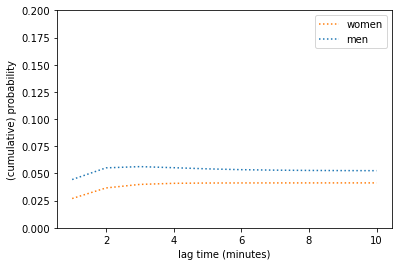

In [40]:
_msmlags = np.arange(1, 11)

#somehow there are topics that are not present in the feature dataframe. exclude those.
_topic_map_forced_labor = features_df[features_df.KeywordLabel.isin(topic_map_forced_labor)].KeywordLabel.tolist()

# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, ['aid giving','food sharing'], _topic_map_forced_labor, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, ['aid giving','food sharing'], _topic_map_forced_labor, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)
plt.savefig('Figure_4_solidarity_following_forced_labor.png')

In [41]:
probs_w

array([[0.01175461, 0.02692809],
       [0.01220135, 0.03665476],
       [0.01163994, 0.03990941],
       [0.01101419, 0.04090783],
       [0.01053382, 0.04118574],
       [0.01021274, 0.04125817],
       [0.01001284, 0.04128041],
       [0.00989301, 0.04129233],
       [0.0098224 , 0.04130147],
       [0.00978084, 0.04130838]])

Aid giving is more likely to follow living conditions for women than for men.

0
1


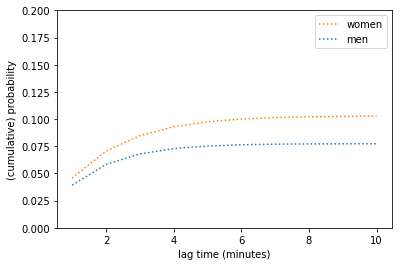

In [42]:
_msmlags = np.arange(1, 11)

#somehow there are topics that are not present in the feature dataframe. exclude those.
_topic_map_living_conditions = features_df[features_df.KeywordLabel.isin(topic_map_living_conditions)].KeywordLabel.tolist()

# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags
                             .shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, ['aid giving','food sharing'], _topic_map_living_conditions, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, ['aid giving','food sharing'], _topic_map_living_conditions, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)
plt.savefig('Figure_4_solidarity_following_living_conditions.png')

## Observation 2

### Qualitative description

As above, a key topic that follows the discussion of aid giving is forced labour. However, this has different weight in the narratives of men and women. Men are more likely to discuss forced labour following aid giving. By contrast, women are more likely to discuss housing and living conditions.

The traffic going through the following two paths are different for men and women.

aid giving-forced labor <br/>
Women: 5.892215934536441 <br/>
Men: 9.179672557709363<br/>

aid giving-living conditions <br/>
Women: 4.989195032183169 <br/>
Men: 3.940806972832768 <br/>




### Quantitative evidence 1

In [43]:
story_start = 'aid giving'
story_end = 'departure'
flux = 1

In [44]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [45]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Print those paths where forced labor follow aid giving for women

In [46]:
result = []

for path in flux_w:
    if len(path.split('aid giving-forced labor-'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

aid giving-forced labor-departure
2.9013178022247055


aid giving-forced labor-violence-departure
0.9454939994184131


aid giving-forced labor-mass murder-loved ones' fates-camp procedures-Appell-transfer-transportation-departure
0.49508289852855375




Print the total amount of traffic going through these nodes

In [47]:
print (np.array(result).sum())

4.341894700171673


Print those paths where forced labor follow aid giving for men

In [48]:
result = []

for path in flux_m:
    if len(path.split('aid giving-forced labor-'))>1:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])

aid giving-forced labor-departure
3.1658578077421957


aid giving-forced labor-food and thirst-adaptation methods-departure
1.3854134901323287


aid giving-forced labor-camp population-selections-departure
1.3041531820717325


aid giving-forced labor-perpetrators-departure
1.2411673400414032


aid giving-forced labor-food and thirst-perpetrators-separations-camp procedures-tattoo-family-religion-Jewish identity-departure
0.07596071668436975


aid giving-forced labor-selections-adaptation methods-International Red Cross-departure
0.0013897253051096366




Print the total amount of traffic going through these nodes

In [49]:
print (np.array(result).sum())

7.17394226197714


Print those paths where living conditions follow aid giving for women

In [50]:
result = []

for path in flux_w:
    if len(path.split('aid giving-living conditions-'))>1 or len(path.split('aid giving-housing conditions-'))>1:
        result.append(flux_w[path])
        print (path)
        print (flux_w[path])
        print ('\n')
print (np.array(result).sum())

aid giving-living conditions-selections-departure
5.7455070546406555


aid giving-living conditions-Appell-food and thirst-family-selections-perpetrators-departure
1.1176046424293313


aid giving-living conditions-Appell-food and thirst-camp population-selections-camp procedures-mass murder-departure
0.7403149069770533


aid giving-living conditions-food and thirst-arrival-departure
0.008656915365406229


aid giving-living conditions-Appell-forced labor-children-protected groups-departure
0.0054926665612285925


7.617576185973674


Print the total amount of traffic going through these nodes

In [51]:
print (np.array(result).sum())

7.617576185973674


Print those paths where living conditions follow aid giving for men

In [52]:
result = []

for path in flux_m:
    if len(path.split('aid giving-living conditions-'))>1 or len(path.split('aid giving-housing conditions-'))>1:
        result.append(flux_m[path])
        print (path)
        print (flux_m[path])
        print ('\n')

aid giving-living conditions-food and thirst-departure
4.228783098653639


aid giving-living conditions-mass murder-departure
1.8610186305629233


aid giving-living conditions-selections-camp procedures-tattoo-camp population-perpetrators-awareness-liberation-departure
0.5081221866708516


aid giving-living conditions-forced labor-selections-camp procedures-departure
0.02221136873663034


aid giving-living conditions-forced labor-kapos-mass murder-transportation-camp procedures-clothing-departure
0.0022774639933337147




Print the total amount of traffic going through these nodes

In [53]:
print (np.array(result).sum())

6.622412748617378


### Visualization

9 labels to show
8 labels to show


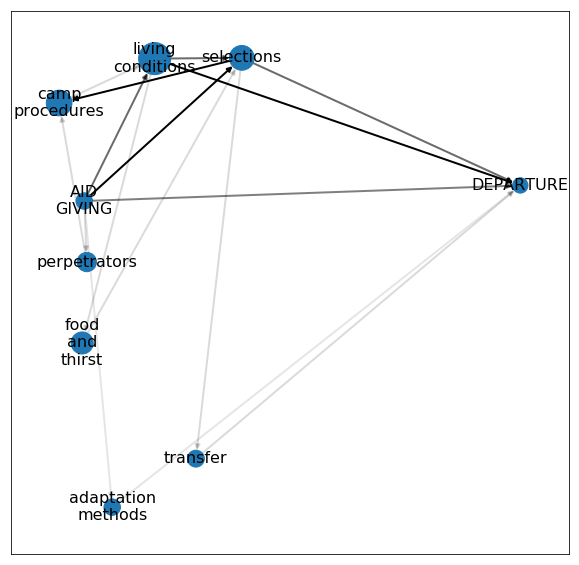

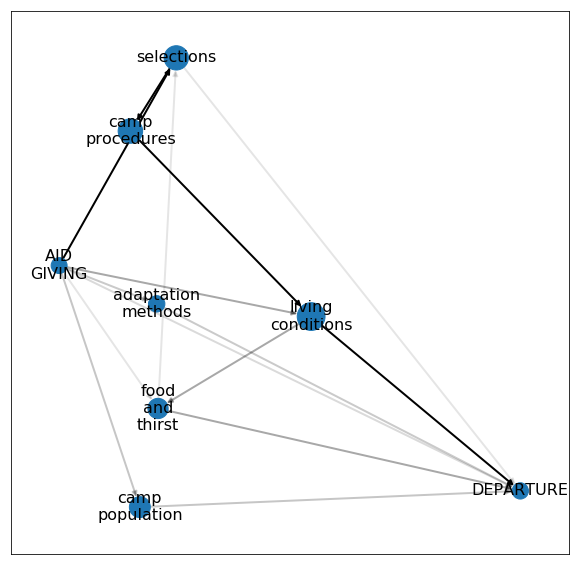

In [54]:
flux = 0.25
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 2

In [55]:
story_start = 'aid giving'
story_end = 'living conditions'

In [56]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

Print the amount of traffic going between them for women and men

In [57]:
print_similar_paths(flux_w,flux_m,max_length=2)

aid giving-living conditions
Women: 9.814251678105654
Men: 8.778841841949959




In [58]:
story_start = 'aid giving'
story_end = 'forced labor'
state_index = features_df.KeywordLabel.to_list()

In [59]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

In [60]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

Print the amount of traffic going between them for women and men

In [61]:
print_similar_paths(flux_w,flux_m,max_length=3)

aid giving-forced labor
Women: 7.481965782762871
Men: 10.992274401469878


aid giving-kapos-forced labor
Women: 2.511315530195176
Men: 3.144328260390745


aid giving-mass murder-forced labor
Women: 2.5314192878512563
Men: 3.0767663897166173


aid giving-camp population-forced labor
Women: 3.14414056863285
Men: 3.7868535627896027




### Quantitative evidence 3

0
1


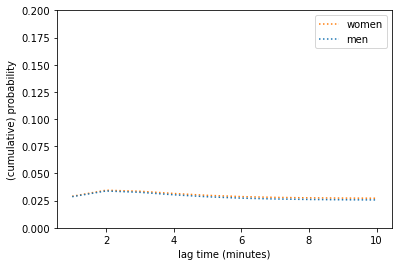

In [62]:
_msmlags = np.arange(1, 11)

#somehow there are topics that are not present in the feature dataframe. exclude those.
#_topic_map_forced_labor = features_df[features_df.KeywordLabel.isin(topic_map_forced_labor)].KeywordLabel.tolist()

# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, ['forced labor'], ['aid giving'],
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, ['forced labor'], ['aid giving'], 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

0
1


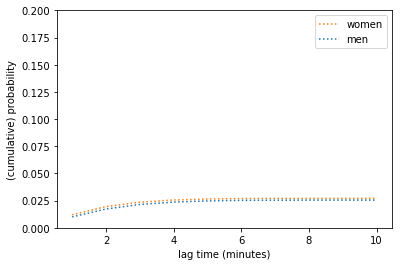

In [63]:
_msmlags = np.arange(1, 11)

#somehow there are topics that are not present in the feature dataframe. exclude those.
#_topic_map_forced_labor = features_df[features_df.KeywordLabel.isin(topic_map_forced_labor)].KeywordLabel.tolist()

# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, ['living conditions'], ['aid giving'],
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, ['living conditions'], ['aid giving'], 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 3

### Qualitative description

Similarly to aid giving, women are more likely to discuss food sharing following living conditions, whereas men discuss it following forced labour. 

The total amount of traffic going through the following two paths for women is 11,8 % and for men it is 8.8%:

living conditions-food-food sharing

living conditions-food sharing

At the same time, the total traffic going through the following paths is different for men (18.3%) and women 15.2):

forced labor-food sharing

forced labor-food-food sharing


### Quantitative evidence 1

story_start = 'arrival'
story_end = 'food sharing'
flux = 1

flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Print those paths where living and housing conditions prime food sharing for women

result = []

for path in flux_w:
    if len(path.split('-living conditions-food sharing'))>1 or len(path.split('-housing conditions-food sharing'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where living and housing conditions prime food sharing for men

result = []

for path in flux_m:
    if len(path.split('-living conditions-food sharing'))>1 or len(path.split('-housing conditions-food sharing'))>1:
        result.append(flux_m[path])
        print (path)
        print (flux_m[path])
        print ('\n')

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where forced labor prime food sharing for women

result = []

for path in flux_w:
    if len(path.split('-forced labor-food sharing'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where forced labor prime food sharing for men

result = []

for path in flux_m:
    if len(path.split('-forced labor-food sharing'))>1:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

### Visualization

flux = 0.2
story_start = 'arrival'
story_end = 'food sharing'
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 2

story_start = 'forced labor'
story_end = 'food sharing'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

print_similar_paths(flux_w,flux_m,max_length=3)

story_start = 'living conditions'
story_end = 'food sharing'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

print_similar_paths(flux_w,flux_m,max_length=3)

### Quantitative evdience 3

Food sharing is more likely to follow forced labor for men than for women.

_msmlags = np.arange(1, 11)

topic_1 = ["food sharing"]
topic_2  = topic_map_forced_labor
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

Food sharing is more likely to follow camp living conditions for women than for men.

_msmlags = np.arange(1, 11)

topic_1 = ["food sharing"]
topic_2  = topic_map_living_conditions
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 4

### Qualitative description

In testimonies of men and women, both living conditions and forced labour are discussed following food sharing. There is no difference in terms of the amount of the traffic that goes from food sharing to forced labour.

food sharing-forced labor <br/>
Women: 5.60066015579362  <br/>
Men: 5.661811177443069  <br/>

However, in case of men more traffic is going from food sharing towards living conditions:

food sharing-living conditions <br/>
Women: 4.612779648936039  <br/>
Men: 5.4796159931673705  <br/>

### Quantitative evidence 1

story_start = 'food sharing'
story_end = 'departure'
flux = 1

flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Print those paths where forced labor follow food sharing for women

result = []

for path in flux_w:
    next_state = path.split('-')[1]
    if next_state =='forced labor':
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where forced labor follow food sharing for men

result = []

for path in flux_m:
    next_state = path.split('-')[1]
    if next_state in topic_map_forced_labor:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where living conditions follow food sharing for women

result = []

for path in flux_w:
    next_state = path.split('-')[1]
    if next_state =='living conditions':
        result.append(flux_w[path])
        print (path)

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where living conditions follow food sharing for men

result = []

for path in flux_m:
    next_state = path.split('-')[1]
    if next_state =="living conditions":
        result.append(flux_m[path])
        print (path)

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

### Visualization

flux = 0.19
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 2

story_start = 'food sharing'
story_end = 'forced labor'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

print_similar_paths(flux_w,flux_m,max_length=2)

story_start = 'food sharing'
story_end = 'living conditions'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

print_similar_paths(flux_w,flux_m,max_length=3)

## Observation 5 A

### Qualitative description

Women tend to discuss social bonds following living environment, whereas men tend to discuss it following forced labour. Different amount of traffic is going through the following paths in case of women (5.3 %) and men (4.3 %):

living conditions-social relations

Different amount of traffic is going through the following paths in case of women (4.6 %) and men (8.6 %):

forced labor-social relations

Finally, food is an key transitionary topic between social relations and living environment for women:

living conditions-food-social relations <br/>
Women: 6.434011448725096<br/>
Men: 3.5924098744045265<br/>

Similarly, food is an key transitionary topic between forced labour and living environment for women:

forced labor-food-social relations<br/>
Women: 5.672980573742698<br/>
Men: 3.5486202551343533<br/>

## Quantitative evidence 1

In [64]:
story_start = 'arrival'
story_end = 'social bonds'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Print those paths where forced labor prime social relations for women

In [65]:
result = []

for path in flux_w:
    if len(path.split('-forced labor-social bonds'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

arrival-camp procedures-living conditions-forced labor-social bonds
3.6318511936237985




Print the total amount of traffic going through these nodes

In [66]:
print (np.array(result).sum())

3.6318511936237985


Print those paths where forced labor prime social relations for men

In [67]:
result = []

for path in flux_m:
    if len(path.split('-forced labor-social bonds'))>1:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])

arrival-selections-camp procedures-tattoo-forced labor-social bonds
6.888082259583269




Print the total amount of traffic going through these nodes

In [68]:
print (np.array(result).sum())

6.888082259583269


Print those paths where living conditions prime social relations for women

In [69]:
result = []

for path in flux_w:
    if len(path.split('living conditions-social bonds'))>1:
        result.append(flux_w[path])
        print (path)
        print (flux_w[path])
        print ('\n')

arrival-selections-camp procedures-living conditions-social bonds
14.125159516495579




Print the total amount of traffic going through these nodes

In [70]:
print (np.array(result).sum())

14.125159516495579


Print those paths where living conditions prime social relations for men

In [71]:
result = []

for path in flux_m:
    if len(path.split('living conditions-social bonds'))>1:
        result.append(flux_m[path])
        print (path)
        print (flux_m[path])
        print ('\n')

arrival-selections-camp procedures-living conditions-social bonds
9.769869383859774




Print the total amount of traffic going through these nodes

In [72]:
print (np.array(result).sum())

9.769869383859774


### Quantitative evidence 2

In [73]:
story_start = 'living conditions'
story_end = 'social bonds'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.6)

In [74]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.6)

In [75]:
print_similar_paths(flux_w,flux_m,max_length=4)

living conditions-perpetrators-social bonds
Women: 2.582344342872378
Men: 1.6365974850158953


living conditions-selections-camp procedures-social bonds
Women: 4.105489300305624
Men: 4.004555863485987


living conditions-adaptation methods-social bonds
Women: 2.47351027304288
Men: 2.9678265487580013


living conditions-family-social bonds
Women: 2.7148294445204497
Men: 2.26955847572284


living conditions-social bonds
Women: 16.320706648424718
Men: 11.45162455299908


living conditions-camp population-social bonds
Women: 3.5151702520054733
Men: 4.287784569292098


living conditions-food and thirst-social bonds
Women: 7.6318357622444895
Men: 4.940148232381754


living conditions-kapos-social bonds
Women: 4.659099683642782
Men: 4.632495366609582


living conditions-aid giving-social bonds
Women: 2.0669824622276494
Men: 1.7475100726772532


living conditions-Appell-social bonds
Women: 2.6007551691085955
Men: 2.195755175605959


living conditions-transfer-social bonds
Women: 2.073524080090

### Visualize

10 labels to show
13 labels to show


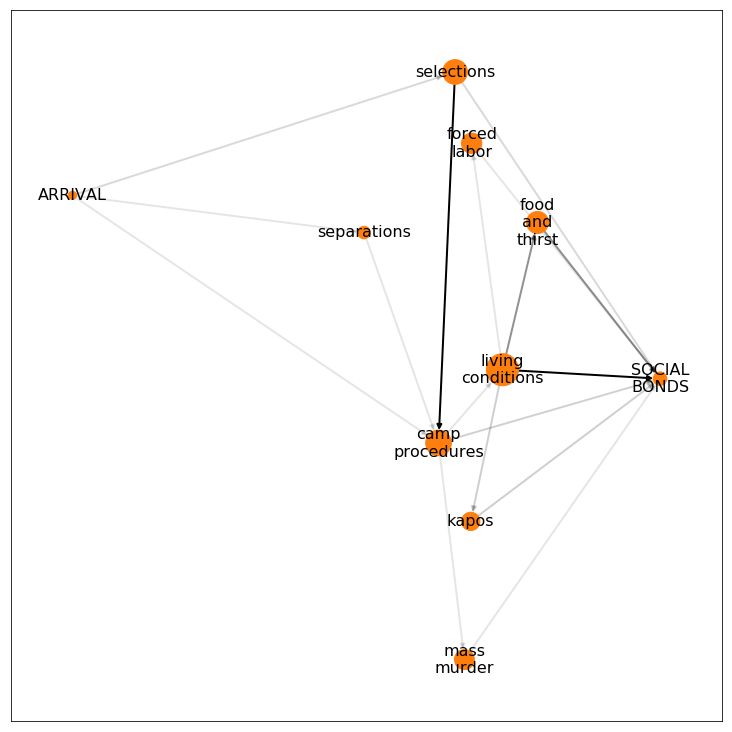

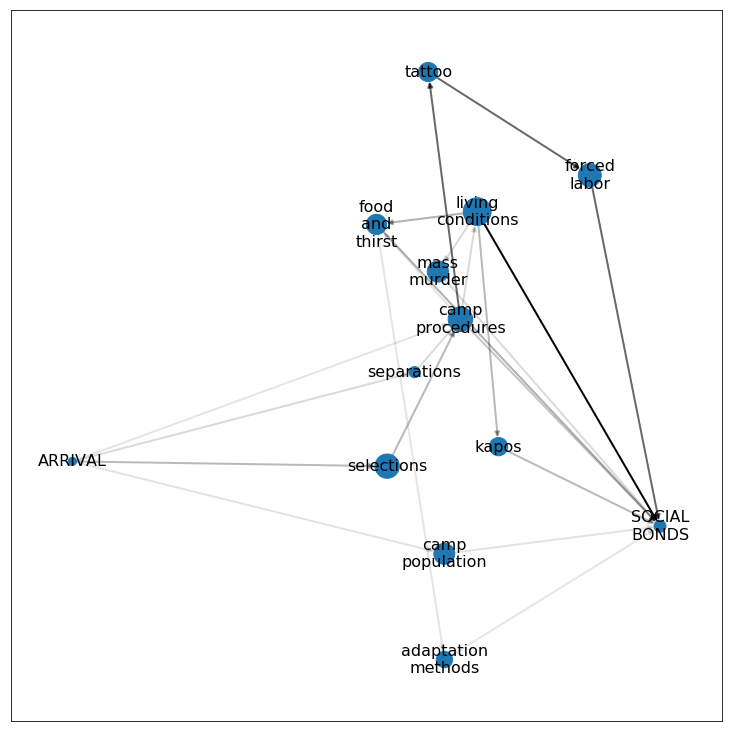

In [192]:
flux = 0.4
from markov_modelling.markov_utils import *
story_start = 'arrival'
story_end = 'social bonds'
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None,gender="w")
plt.tight_layout(pad=0.1)

plt.savefig("figure_5_w.png")
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None,gender="m")
plt.tight_layout(pad=0.1)
plt.savefig("figure_5_m.png")

In [77]:
story_start = 'forced labor'
story_end = 'social bonds'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

In [78]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

In [79]:
print_similar_paths(flux_w,flux_m,max_length=3)

forced labor-living conditions-social bonds
Women: 8.037953985215351
Men: 6.425379298646003


forced labor-kapos-social bonds
Women: 3.9639315002887456
Men: 4.583375157432722


forced labor-food and thirst-social bonds
Women: 6.449318143224997
Men: 4.8540788370787915


forced labor-camp population-social bonds
Women: 4.407367563540927
Men: 5.609161101262786


forced labor-social bonds
Women: 5.368733554640419
Men: 8.970560206630811




### Visualization

4 labels to show
4 labels to show


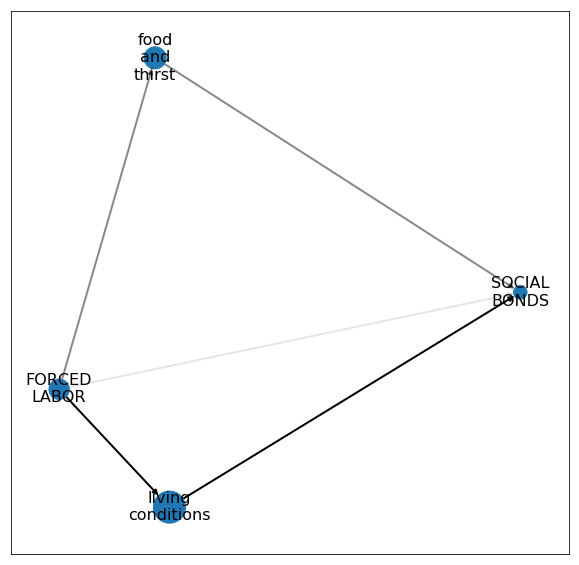

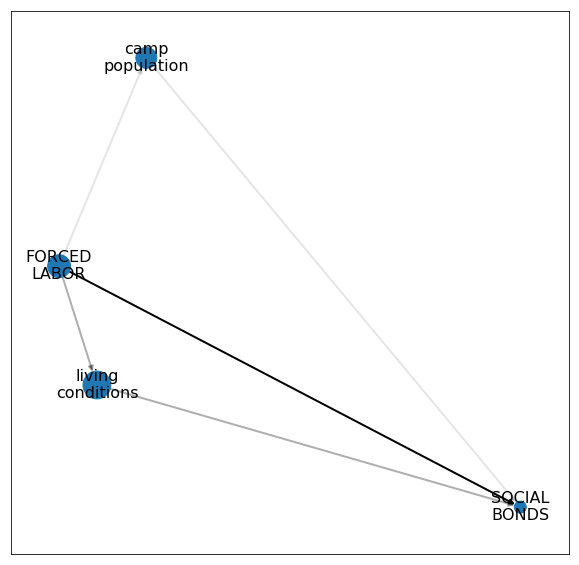

In [80]:
flux = 0.16
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evdience 3

Social relations are more likely to follow forced labor for men than for women.

0
1


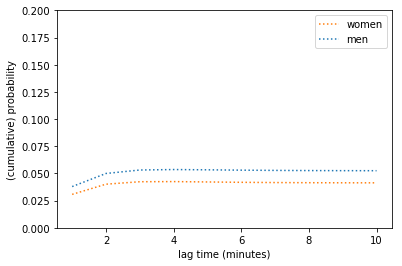

In [185]:
_msmlags = np.arange(1, 11)

topic_1 = ["social bonds"]
topic_2  = ['forced labor']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

Social relations are more likely to follow camp living conditions for women than for men.

0
1


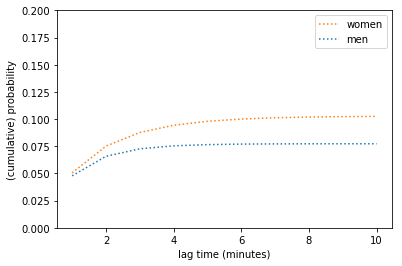

In [82]:
_msmlags = np.arange(1, 11)

topic_1 = ["social bonds"]
topic_2  = ["living conditions"]
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 5

### Qualitative description

In narratives of both women and men, the discussion of friendship tends to be preceded by the discussion of living environments and forced labor. For women,  the discussion of friendship followng living environment is stronger:

living conditions-friends <br/>
Women: 7.186269105921992 <br/>
Men: 4.987467244255548 <br/>

An important transitionary topic between living conditions and friends is food:

living conditions-food-friends <br/>
Women: 3.7173273244734077 <br/>
Men: 2.806933358478007 <br/>

But this is stronger for women.

Another important transitionary topic between them is camp adaptation methods, which is stronger for men:

living conditions-camp adaptation methods-friends <br/>
Women: 2.8453985144436293 <br/>
Men: 3.213141994177019 <br/>

For women and men, the traffic between forced labor and friends is equal:

forced labor-friends <br/>
Women: 5.134709271710951 <br/>
Men: 4.946899219077014 <br/>

But the probability of transition from forced labor to friends is higher for men.

### Quantitative evidence 1

story_start = 'arrival'
story_end = 'friends'
flux = 0.2
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

flux_w

flux_m

Print those paths where forced labor prime friends for women

result = []

for path in flux_w:
    if len(path.split('-forced labor-friends'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where forced labor prime aid giving for men

result = []

for path in flux_m:
    if len(path.split('-forced labor-friends'))>1:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])


Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where living conditions prime friends for women

result = []

for path in flux_w:
    if len(path.split('living conditions-friends'))>1:
        result.append(flux_w[path])
        print (path)
        print (flux_w[path])
        print ('\n')

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where forced labor prime aid giving for men

result = []

for path in flux_m:
    if len(path.split('living conditions-friends'))>1:
        result.append(flux_m[path])
        print (path)
        print (flux_m[path])
        print ('\n')

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

### Visualize

flux = 0.2
story_start = 'arrival'
story_end = 'friends'
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 1

story_start = 'living conditions'
story_end = 'friends'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

print_similar_paths(flux_w,flux_m)

### Visualize it

flux = 0.2
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 2

story_start = 'forced labor'
story_end = 'friends'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

story_start = 'living conditions'
story_end = 'friends'
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

print_similar_paths(flux_w,flux_m)

### Quantitative evdience 3

Friends are more likely to follow forced labor for men than for women.

_msmlags = np.arange(1, 11)

topic_1 = ["friends","social relations"]
topic_2  = topic_map_forced_labor
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)
plt.savefig("figure_4_social_bonds_following_forced_labor.png")

Friends are more likely to follow camp living conditions for women than for men.

_msmlags = np.arange(1, 11)

topic_1 = ["friends","social relations"]
topic_2  = topic_map_living_conditions
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)
plt.savefig("figure_4_social_bonds_following_living_conditions.png")

## Observation 6

### Qualitative description

Women are more likely to discuss living conditions following friendship than man do. Similarly women are more likely to discuss forced laboru followng friendship:

friends-living conditions <br/>
Women: 3.535931711450818 <br/>
Men: 2.198317704062195 <br/>

For women food is an important transitionary topic:

friends-food-living conditions:3.5758882151694316


Similarly, women are much more likely to follow with forced labour after friendship:

friends-forced labor <br/>
Women: 7.431426222661657 <br/>
Men: 2.6768092638626446 <br/>

Aid giving is a more important transitionary topic between friends and forced labor:

friends-aid giving-forced labor <br/>
Women: 1.5338897117404788 <br/>
Men: 0.36132920515314015 <br/>

For women food is an important transitionary topic between friends and forced labor.

friends-food-forced labor:3.557599215626483 <br/>




## Quantitative evidence 1

story_start = 'friends'
story_end = 'departure'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


Print those paths where forced labor follow friends for women

result = []

for path in flux_w:
    if len(path.split('friends-forced labor-'))>1:
        print (path)
        print (flux_w[path])
        result.append(flux_w[path])

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where forced labor follow friends for men

result = []

for path in flux_m:
    if len(path.split('friends-forced labor-'))>1:
        print (path)
        print (flux_m[path])
        result.append(flux_m[path])

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where living conditions follow friends for women

result = []

for path in flux_w:
    if len(path.split('friends-living conditions-'))>1:
        print (path)
        print (flux_w[path])
        result.append(flux_w[path])

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where living conditions follow friends for women

result = []

for path in flux_m:
    if len(path.split('friends-living conditions-'))>1:
        print (path)
        print (flux_m[path])
        result.append(flux_m[path])

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

### Visualize

story_start = 'friends'
story_end = 'departure'

flux = 0.2
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 2

story_start = 'friends'
story_end = 'living conditions'
state_index = features_df.KeywordLabel.to_list()

flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

Print the most important pathways for women

print_paths(flux_w,max_length=3)

Print the most important pathways for men

print_paths(flux_m,max_length=3)

Print similar pathways

print_similar_paths(flux_w,flux_m)

story_start = 'friends'
story_end = 'forced labor'
state_index = features_df.KeywordLabel.to_list()

flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

Print the most important pathways for women

print_paths(flux_w,max_length=3)

Print the most important pathways for men

print_paths(flux_m,max_length=3)

print_similar_paths(flux_w,flux_m)

### Quantitative evdience 3

_msmlags = np.arange(1, 11)

topic_2 = ["friends"]
topic_1  = topic_map_forced_labor
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

_msmlags = np.arange(1, 11)

topic_2 = ["friends"]
topic_1  = topic_map_living_conditions
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 7

## Qualitative description

If we look at all possible narrative pathways that can connect arrival to and departure from Birkenau, we can see that a significant amount of traffic is going through aid giving  and social bonds. Their significance can be understood if they are compared to Appel. The amount of traffic going through friendship  and food sharing is less significant. 

In case of women, more traffic is going through these nodes, with an exception of aid giving:

•    social bonds: 3.47 %

•    aid giving: 2.46 %

•    friendship: 0.85 $

•    food sharing: 0.35 %

In case of men, less traffic is going through these nodes:

•.	 social bonds: 2.46 %

•    aid giving: 2.6 %

•    friendship: 0.24 %

•    food sharing: 0.29 %

#### Total traffic going through them in the complete dataset (men and women):

In [83]:
story_start = 'arrival'
story_end = 'departure'
flux = 1
flux_complete = calculate_flux(data_set_1_complete,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
#flux_complete_dataset_2 = calculate_flux(data_set_2_complete,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


Calculate the total traffic going through social bonds

In [84]:
total_social_bonds = []
total_aid_giving = []
total_appell = []
total_friends = []
total_food_sharing = []
total_escapes = []

In [85]:
for i,element in enumerate(flux_complete):
    if 'social bonds' in element.split('-'):
        total_social_bonds.append(flux_complete[element])
print(np.array(total_social_bonds).sum())

2.8281215492788667


Calculate the total traffic going through aid giving

In [86]:
for i,element in enumerate(flux_complete):
    if 'aid giving' in element.split('-'):
        total_aid_giving.append(flux_complete[element])
print(np.array(total_aid_giving).sum())

5.224237884903719


Calculate the total traffic going through Appell

In [87]:
for i,element in enumerate(flux_complete):
    if 'Appell' in element.split('-'):
        total_appell.append(flux_complete[element])
print(np.array(total_appell).sum())

8.891104632759086


Calculate the total traffic going through escape

In [88]:
for i,element in enumerate(flux_complete):
    if 'escapes' in element.split('-'):
        total_escapes.append(flux_complete[element])
print(np.array(total_escapes).sum())

0.6997011068934076


Calculate the total traffic going through friendship

for i,element in enumerate(flux_complete):
    if 'friends' in element.split('-'):
        total_friends.append(flux_complete[element])
print(np.array(total_friends).sum())

Calculate the total traffic going through food sharing

for i,element in enumerate(flux_complete):
    if 'food sharing' in element.split('-'):
        total_food_sharing.append(flux_complete[element])
print(np.array(total_food_sharing).sum())

#### Total traffic going through them in the dataset of women

In [89]:
story_start = 'arrival'
story_end = 'departure'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
#flux_w_dataset_2 = calculate_flux(data_set_2_w,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


In [90]:
len(flux_w)

191

In [91]:
total_social_bonds = []
total_aid_giving = []
total_appell = []
total_friends = []
total_food_sharing = []

Calculate the total traffic going through social bonds

In [92]:
for i,element in enumerate(flux_w):
    if 'social bonds' in element.split('-'):
        total_social_bonds.append(flux_w[element])
print(np.array(total_social_bonds).sum())

4.141360791637953


Calculate the total traffic going through aid giving

In [93]:
for i,element in enumerate(flux_w):
    if 'aid giving' in element.split('-'):
        total_aid_giving.append(flux_w[element])
print(np.array(total_aid_giving).sum())

5.2575407646590255


Calculate the total traffic going through friendship

for i,element in enumerate(flux_w):
    if 'friends' in element.split('-'):
        total_friends.append(flux_w[element])
print(np.array(total_friends).sum())

Calculate the total traffic going through food sharing

for i,element in enumerate(flux_w):
    if 'food sharing' in element.split('-'):
        total_food_sharing.append(flux_w[element])
        #print (element)
        #print (flux_w[element])
print(np.array(total_food_sharing).sum())

#### Total traffic going through them in the dataset of men

In [94]:
story_start = 'arrival'
story_end = 'departure'
flux = 1
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
#flux_m_dataset_2 = calculate_flux(data_set_2_m,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


In [95]:
total_social_bonds = []
total_aid_giving = []
total_appell = []
total_friends = []
total_food_sharing = []



Calculate the total traffic going through social bonds

In [96]:
for i,element in enumerate(flux_m):
    if 'social bonds' in element.split('-'):
        total_social_bonds.append(flux_m[element])
print(np.array(total_social_bonds).sum())

1.3814361914867186


Calculate the total traffic going through aid giving

In [97]:
for i,element in enumerate(flux_m):
    if 'aid giving' in element.split('-'):
        total_aid_giving.append(flux_m[element])
print(np.array(total_aid_giving).sum())

4.257581362347621


Calculate the total traffic going through friendship

for i,element in enumerate(flux_m):
    if 'friends' in element.split('-'):
        total_friends.append(flux_m[element])
print(np.array(total_friends).sum())

Calculate the total traffic going through food sharing

total_food_sharing = []

for i,element in enumerate(flux_m):
    if 'food sharing' in element.split('-'):
        #print (element)
        #print (flux_m[element])
        total_food_sharing.append(flux_m[element])
print(np.array(total_food_sharing).sum())

## Observation 8

### Qualitative Description

In testimonies of women there are important narrative pathways that lead to the discussion of survival explanations and involve social bonds (friends and social relations) as states preceding survival explanations; in testimonies of men such paths have significantly less traffic (the ratio is more than 3 times for women)

At the same time, in testimonies of men, between aid giving and survival explanation there is slightly more traffic (ratio is 1.6 times).

The study of direct link has similar results:

aid giving-survival explanations <br/>
Women: 2.6696661754080866 <br/>
Men: 3.8067494674128137 <br/>

But in case of women social relations and friends are important transitionary topics:

aid giving-social relations-survival explanations:1.3752851611513381 <br/>
aid giving-friends-survival explanations:0.8100798985654745 <br/>

The amount of direct traffic between social relations and survival explanations is much larger for women:

social relations-survival explanations <br/>
Women: 3.3426904751901763 <br/>
Men: 0.6392835020909489 <br/>


With friends, there is slightly more traffic in case of men:

friends-survival explanations <br/>
Women: 1.9655525123995026 <br/>
Men: 2.17582398231009 <br/>



### Quantitative evidence 1

In [98]:
story_start = 'arrival'
story_end = 'survival explanations'

In [99]:
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Find social bonds preceding survivor explanation in women narratives

In [100]:
result = []
for path in flux_w:
    if len(path.split('-social bonds-survival explanations'))>1 or len(path.split('-friends-survival explanations'))>1:
        print (path)
        print (flux_w[path])
        result.append(flux_w[path])
        print ('\n')
print (np.array(result).sum())

arrival-camp procedures-living conditions-social bonds-survival explanations
3.6135341107315866


3.6135341107315866


Print the total amount of traffic going through these nodes

In [101]:
print (np.array(result).sum())

3.6135341107315866


Find aid giving in women narratives

In [102]:
result = []
for path in flux_w:
    if len(path.split('-aid giving-survival explanations'))>1:
        print (path)
        print (flux_w[path])
        result.append(flux_w[path])
        print ('\n')
print (np.array(result).sum())

arrival-camp procedures-living conditions-forced labor-aid giving-survival explanations
2.651963321170661


2.651963321170661


Print the total amount of traffic going through these nodes

In [103]:
print (np.array(result).sum())

2.651963321170661


Find social bonds preceding survivor explanation in men narratives

In [104]:
result = []
for path in flux_m:
    if len(path.split('-social bonds-survival explanations'))>1 or len(path.split('-friends-survival explanations'))>1:
        print (path)
        print (flux_m[path])
        result.append(flux_m[path])
        print ('\n')
print (np.array(result).sum())

arrival-perpetrators-camp procedures-living conditions-social bonds-survival explanations
1.1295851464432363


arrival-contacts-camp procedures-forced labor-violence-social bonds-survival explanations
0.05893096221315691


1.1885161086563931


Print the total amount of traffic going through these nodes

In [105]:
print (np.array(result).sum())

1.1885161086563931


Find aid giving preceding survivor explanation in women narratives

In [106]:
result = []
for path in flux_m:
    if len(path.split('-aid giving-survival explanations'))>1:
        print (path)
        print (flux_m[path])
        result.append(flux_m[path])
        print ('\n')
print (np.array(result).sum())

arrival-selections-camp procedures-tattoo-forced labor-aid giving-survival explanations
4.344444255121869


4.344444255121869


Print the total amount of traffic going through these nodes

In [107]:
print (np.array(result).sum())

4.344444255121869


### Quantitative evidence 2

In [108]:
story_start = 'aid giving'
story_end = 'survival explanations'
state_index = features_df.KeywordLabel.to_list()

In [109]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

In [110]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

In [111]:
print_paths(flux_w,max_length=3)

aid giving-family-survival explanations:4.29079585930733


aid giving-perpetrators-survival explanations:3.970047662924726


aid giving-forced labor-survival explanations:3.651327629961167


aid giving-adaptation methods-survival explanations:3.390740441154285


aid giving-survival explanations:3.138798227433501


aid giving-psychological reactions-survival explanations:2.1066925321149093


aid giving-medical care-survival explanations:1.7674348712869168


aid giving-mass murder-survival explanations:1.509612976431295


aid giving-diseases-survival explanations:1.4081531952693094


aid giving-killings-survival explanations:1.0788656548975841


aid giving-awareness-survival explanations:0.9798534362157163


aid giving-children-survival explanations:0.8304285868952725


aid giving-hiding and evasion-survival explanations:0.7795726416980582


aid giving-religion-survival explanations:0.7501565460457557


aid giving-c-survival explanations:0.666802452405413


aid giving-attitudes-survival 

In [112]:
print_paths(flux_m,max_length=3)

aid giving-survival explanations:5.455223048675577


aid giving-camp population-survival explanations:3.7880716585662393


aid giving-forced labor-survival explanations:3.7560532296396496


aid giving-food and thirst-survival explanations:3.5478067789707644


aid giving-kapos-survival explanations:2.567400935302172


aid giving-mass murder-survival explanations:2.2041202987158854


aid giving-family-survival explanations:1.9641094761499036


aid giving-food acquisition-survival explanations:1.2986966336938934


aid giving-religion-survival explanations:1.1697383266290253


aid giving-punishments-survival explanations:1.145665664251949


aid giving-liberation-survival explanations:0.7306701755968389


aid giving-resistance-survival explanations:0.5612412418888765


aid giving-rumors-survival explanations:0.20063764243767843




In [113]:
print_similar_paths(flux_w,flux_m)

aid giving-selections-camp procedures-living conditions-survival explanations
Women: 5.748544004084906
Men: 5.764030485971587


aid giving-family-survival explanations
Women: 4.29079585930733
Men: 1.9641094761499036


aid giving-survival explanations
Women: 3.138798227433501
Men: 5.455223048675577


aid giving-forced labor-survival explanations
Women: 3.651327629961167
Men: 3.7560532296396496


aid giving-contacts-camp procedures-clothing-survival explanations
Women: 0.980245336583629
Men: 0.0028717718158975205


aid giving-rumors-survival explanations
Women: 0.003396777013468156
Men: 0.20063764243767843


aid giving-punishments-survival explanations
Women: 0.0005891128700180504
Men: 1.145665664251949


aid giving-religion-survival explanations
Women: 0.7501565460457557
Men: 1.1697383266290253


aid giving-mass murder-survival explanations
Women: 1.509612976431295
Men: 2.2041202987158854




In [114]:
story_start = 'social bonds'
story_end = 'survival explanations'
state_index = features_df.KeywordLabel.to_list()
flux = 0.3

In [115]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [116]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [117]:
print_paths(flux_w)

social bonds-living conditions-survival explanations:5.722390462039482


social bonds-selections-survival explanations:5.1851136052040765


social bonds-survival explanations:4.578492998774201


social bonds-food and thirst-selections-camp procedures-mass murder-survival explanations:4.057261803914883


social bonds-forced labor-perpetrators-survival explanations:3.798390956294935


social bonds-camp population-selections-camp procedures-living conditions-forced labor-survival explanations:3.636916395300351


social bonds-family-survival explanations:3.601018884324974




In [118]:
print_paths(flux_m)

social bonds-camp population-survival explanations:6.175267523647512


social bonds-living conditions-survival explanations:5.799617717140965


social bonds-selections-survival explanations:5.6187940612679945


social bonds-aid giving-selections-camp procedures-living conditions-food and thirst-survival explanations:5.121150758600067


social bonds-tattoo-survival explanations:4.5052045051170655


social bonds-food and thirst-selections-camp procedures-living conditions-departure-survival explanations:4.041111857736261




In [119]:
print_similar_paths(flux_w,flux_m)

social bonds-selections-survival explanations
Women: 5.1851136052040765
Men: 5.6187940612679945


social bonds-living conditions-survival explanations
Women: 5.722390462039482
Men: 5.799617717140965




story_start = 'friends'
story_end = 'survival explanations'
state_index = features_df.KeywordLabel.to_list()

flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

print_paths(flux_w,max_length=3)

print_paths(flux_m,max_length=3)

print_similar_paths(flux_w,flux_m)

## Visualize


Notice that social bonds are "missing" from the plot showing men

7 labels to show
5 labels to show


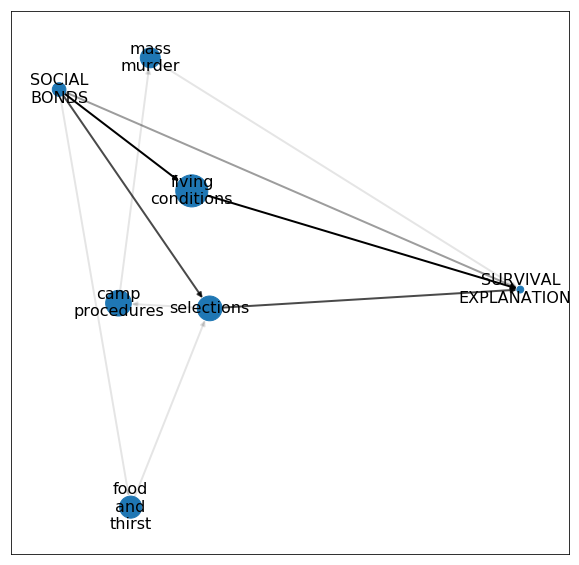

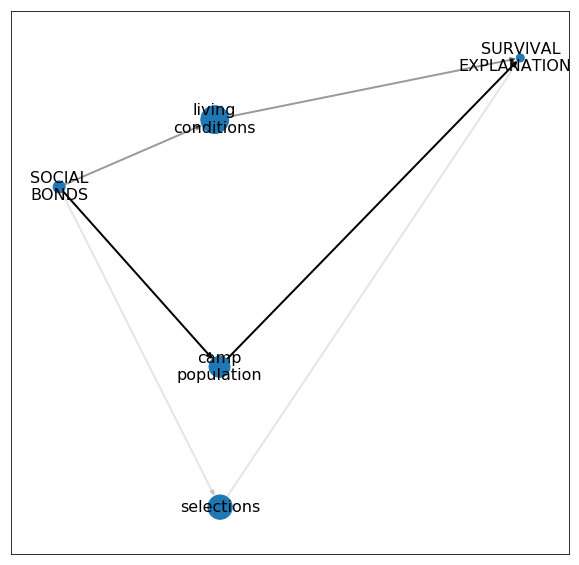

In [120]:
story_start = 'social bonds'
story_end = 'survival explanations'
flux = 0.17
res=visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evdience 3

The probability that survival explanations follow friends and social relations is higher for women.

0
1


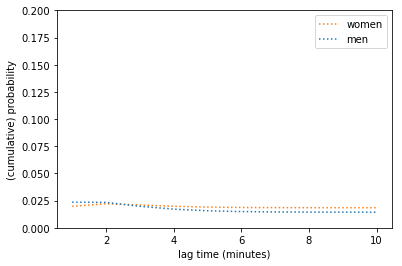

In [121]:
_msmlags = np.arange(1, 11)

topic_1 = ["social bonds","friends"]
topic_2  = ['survival explanations','survival']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)
plt.savefig('Figure_4_social_relations_friends_following_survival_explanations.png')

0
1


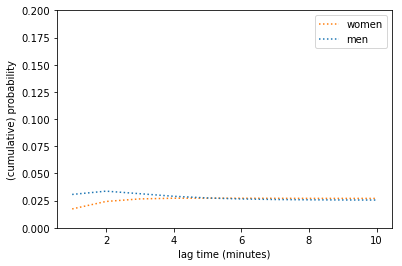

In [122]:
_msmlags = np.arange(1, 11)

topic_1 = ["aid giving","food sharing"]
topic_2  = ['survival explanations','survival']
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)
plt.savefig('Figure_4_aid_giving_food sharing_following_survival_explanations.png')

## Observation 9

### Qualitative description

The moment when one particularly needed the help of others was the selection, when the ill and those who were unable to work were selected to be sent to gas chambers. In testimonies we can often read that victims helped each other in these moments (for instance by hiding or holding the ill); yet victims attribute their survival of selections to the help of their peers and friends. This narrative frame corresponds to the following narrative pathways:
- selections-social relations-survival explanations <br/>
- selections-friends-survival explanations <br/>
- selections-aid giving-survival explanations <br/>

These narrative pathways are more significant in testimonies of women than men.

In case of women:

selections-aid giving-survival explanations:1.372566897382252 <br/>
selections-social relations-survival explanations:0.8517907825853956 <br/>
selections-friends-survival explanations:0.4084233290441179 <br/>

In case of men:

selections-aid giving-survival explanations:0.9130792244020753 <br/>
selections-friends-survival explanations: 0.22597524390714183 <br/>
no path with social relations <br/>


Men and women are equally likely to connect selection with survival explanations:

selections-survival explanations <br/>
Women: 5.995184312276154 <br/>
Men: 5.573167275281716 <br/>

Similarly, another moment when one needed the help of others was the Appel, again women discuss Appel survivor explanations with friends and social relations as transitionary topics:

Appell-social relations-survival explanations:1.2750393765030372 <br/>
Appell-friends-survival explanations:0.35100749020630817 <br/>


### Quantitative evidence 1

In [123]:
story_start = 'selections'
story_end = 'survival explanations'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [124]:
print_paths(flux_w,max_length=4)

selections-camp procedures-living conditions-survival explanations:5.769483916355495


selections-survival explanations:5.631694100274501


selections-mass murder-survival explanations:4.508365261459452


selections-perpetrators-survival explanations:4.291442714467611


selections-family-survival explanations:3.7907150592976073


selections-adaptation methods-survival explanations:3.398104101597192


selections-camp procedures-tattoo-survival explanations:2.3598209179473995


selections-living conditions-food and thirst-survival explanations:2.3544433448414677


selections-camp population-survival explanations:2.3203000860325735


selections-departure-survival explanations:2.08248412589937


selections-transfer-survival explanations:2.067719367130566


selections-aid giving-survival explanations:1.894479396213194


selections-social bonds-survival explanations:1.256178877237968


selections-camp procedures-survival explanations:1.2251064011961112


selections-psychological reactions-su

In [125]:
print_paths(flux_m,max_length=3)

selections-survival explanations:6.256139286632591


selections-family-survival explanations:3.252758605427242


selections-perpetrators-survival explanations:3.2435014992692444


selections-camp population-survival explanations:3.0709778219292434


selections-transfer-survival explanations:3.0537314612912194


selections-loved ones' fates-survival explanations:2.999584714177863


selections-mass murder-survival explanations:2.2278113159710013


selections-departure-survival explanations:1.4822941711450317


selections-aid giving-survival explanations:1.3873419352272731


selections-psychological reactions-survival explanations:1.1868030365938083


selections-hiding and evasion-survival explanations:1.0539409023848318


selections-adaptation methods-survival explanations:1.033487261445508


selections-killings-survival explanations:0.9677123753750639


selections-medical care-survival explanations:0.8045576660862397


selections-contacts-survival explanations:0.7085861518537493


selec

In [126]:
print_similar_paths(flux_w,flux_m)

selections-camp population-survival explanations
Women: 2.3203000860325735
Men: 3.0709778219292434


selections-camp procedures-tattoo-survival explanations
Women: 2.3598209179473995
Men: 4.520775962781666


selections-survival explanations
Women: 5.631694100274501
Men: 6.256139286632591


selections-departure-survival explanations
Women: 2.08248412589937
Men: 1.4822941711450317


selections-hiding and evasion-survival explanations
Women: 0.8458746279532021
Men: 1.0539409023848318


selections-c-survival explanations
Women: 0.37663936411843973
Men: 0.19309763417874876


selections-suicides-survival explanations
Women: 0.29194238832386665
Men: 0.2543518484986765


selections-social bonds-survival explanations
Women: 1.256178877237968
Men: 0.6994455293744931


selections-transfer-survival explanations
Women: 2.067719367130566
Men: 3.0537314612912194


selections-medical care-survival explanations
Women: 0.8383282855693834
Men: 0.8045576660862397


selections-warnings-survival explanation

In [127]:
story_start = 'Appell'
story_end = 'survival explanations'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [128]:
print_paths(flux_w,max_length=4)

Appell-living conditions-survival explanations:5.775937169813103


Appell-living conditions-selections-survival explanations:5.218462060743188


Appell-mass murder-survival explanations:4.302438981362692


Appell-perpetrators-survival explanations:3.493392713854562


Appell-family-survival explanations:3.1031652912545185


Appell-survival explanations:3.0718610567735842


Appell-kapos-survival explanations:2.8414743477415807


Appell-adaptation methods-survival explanations:2.7517096053990304


Appell-food and thirst-survival explanations:2.3856258880967265


Appell-forced labor-aid giving-survival explanations:2.347244742478545


Appell-camp population-survival explanations:2.319761054311064


Appell-food and thirst-family-survival explanations:1.6783854409489436


Appell-violence-survival explanations:1.388563105690137


Appell-living conditions-diseases-survival explanations:1.303936739019986


Appell-food and thirst-diseases-survival explanations:1.1162433452082134


Appell-killing

In [129]:
print_paths(flux_m,max_length=3)

Appell-living conditions-survival explanations:5.818014635903181


Appell-food and thirst-survival explanations:5.190547088575549


Appell-camp population-survival explanations:4.747071892344955


Appell-forced labor-survival explanations:3.7834146637033093


Appell-departure-survival explanations:3.657900355609112


Appell-family-survival explanations:3.3923955442012264


Appell-killings-survival explanations:1.7591388396042464


Appell-aid giving-survival explanations:1.4486304159472525


Appell-religion-survival explanations:1.1102269530507727


Appell-survival explanations:1.0939392459271577


Appell-resistance-survival explanations:0.5356599862027014




In [130]:
print_similar_paths(flux_w,flux_m)

Appell-killings-survival explanations
Women: 1.0806996197381447
Men: 1.7591388396042464


Appell-survival explanations
Women: 3.0718610567735842
Men: 1.0939392459271577


Appell-diseases-medical care-survival explanations
Women: 0.8722055644460726
Men: 1.362938906068088


Appell-selections-camp procedures-tattoo-survival explanations
Women: 2.3460212494112374
Men: 4.505032913364435


Appell-living conditions-survival explanations
Women: 5.775937169813103
Men: 5.818014635903181


Appell-family-survival explanations
Women: 3.1031652912545185
Men: 3.3923955442012264


Appell-camp population-survival explanations
Women: 2.319761054311064
Men: 4.747071892344955


Appell-food and thirst-survival explanations
Women: 2.3856258880967265
Men: 5.190547088575549




### Visualization

6 labels to show
6 labels to show


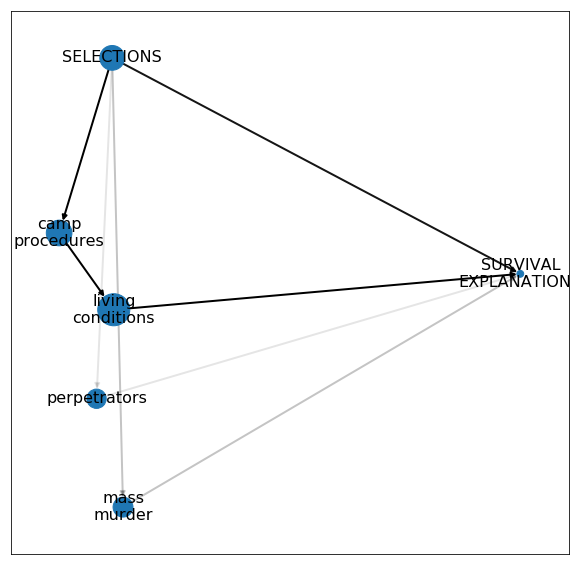

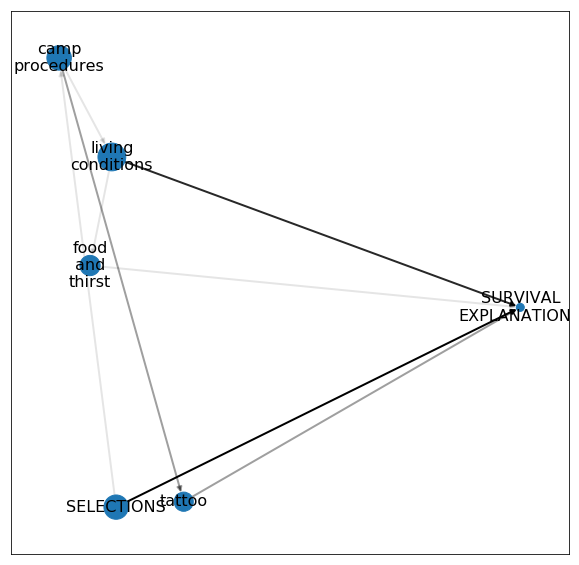

In [131]:
flux = 0.2
res = visualize_most_important_paths(data_set_1_w,flux,features_df,['selections'],story_end,None)
res=visualize_most_important_paths(data_set_1_m,flux,features_df,['selections'],story_end,None)

## Observation 10

### Qualitative description

Social relations and aid giving are closely connected in narratives of both men and women; (slightly more connected for men). For women, the most important transitionary topic is living conditions and selection, for men it is forced labor.

social relations-forced labor-aid giving <br/>
Women: 2.8948768437334533 <br/>
Men: 6.7009466811388885 <br/>


social relations-living conditions-aid giving <br/>
Women: 3.2443759794384 <br/>
Men: 1.9733942618306775 <br/>


### Quantitative evidence

In [132]:
flux = 1
story_start = 'social bonds'
story_end = 'aid giving'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [133]:
print_paths(flux_w,max_length=3)

social bonds-living conditions-aid giving:7.563304275507526


social bonds-aid giving:6.408718553228326


social bonds-forced labor-aid giving:5.2357883119545


social bonds-camp population-aid giving:4.415710520932789


social bonds-adaptation methods-aid giving:3.6169488223597677


social bonds-family-aid giving:3.6162411746857215


social bonds-kapos-aid giving:3.237357186917043


social bonds-perpetrators-aid giving:3.13416388961232


social bonds-departure-aid giving:3.05822274590532


social bonds-mass murder-aid giving:2.7839675571310867


social bonds-transfer-aid giving:2.49313821347585


social bonds-camp procedures-aid giving:2.439568990829018


social bonds-physical condition-aid giving:1.4039758031547305


social bonds-violence-aid giving:1.3063113895322787


social bonds-psychological reactions-aid giving:1.2349362057013644


social bonds-children-aid giving:1.1846892926508366


social bonds-diseases-aid giving:1.1337623841655602


social bonds-punishments-aid giving:0.91

In [134]:
print_paths(flux_m,max_length=3)

social bonds-aid giving:8.687976069059557


social bonds-forced labor-aid giving:5.957759262600702


social bonds-camp population-aid giving:5.1470732548014695


social bonds-living conditions-aid giving:4.95248536743189


social bonds-adaptation methods-aid giving:3.709364070325481


social bonds-food and thirst-aid giving:3.093154444066224


social bonds-transfer-aid giving:2.73133598337654


social bonds-mass murder-aid giving:2.7244157443811834


social bonds-selections-aid giving:2.5648873470780202


social bonds-family-aid giving:1.8861320857430481


social bonds-killings-aid giving:1.6188293911475278


social bonds-medical care-aid giving:1.3768715192605256


social bonds-Appell-aid giving:1.1426026651492884


social bonds-covert activities-aid giving:1.0595162281932493


social bonds-religion-aid giving:0.9936544289238773


social bonds-diseases-aid giving:0.6917905887777624


social bonds-barter-aid giving:0.6776030199678132


social bonds-cultural activities-aid giving:0.5337

In [135]:
print_similar_paths(flux_w,flux_m)

social bonds-religion-aid giving
Women: 0.8733164767924866
Men: 0.9936544289238773


social bonds-diseases-aid giving
Women: 1.1337623841655602
Men: 0.6917905887777624


social bonds-cultural activities-aid giving
Women: 0.3241400114735795
Men: 0.5337532088231913


social bonds-medical care-aid giving
Women: 0.8524436753187116
Men: 1.3768715192605256


social bonds-killings-aid giving
Women: 0.5599237152393676
Men: 1.6188293911475278


social bonds-adaptation methods-aid giving
Women: 3.6169488223597677
Men: 3.709364070325481


social bonds-aid giving
Women: 6.408718553228326
Men: 8.687976069059557


social bonds-family-aid giving
Women: 3.6162411746857215
Men: 1.8861320857430481


social bonds-camp population-aid giving
Women: 4.415710520932789
Men: 5.1470732548014695


social bonds-living conditions-aid giving
Women: 7.563304275507526
Men: 4.95248536743189


social bonds-transfer-aid giving
Women: 2.49313821347585
Men: 2.73133598337654


social bonds-survival explanations-aid giving


### Visualize

7 labels to show
5 labels to show


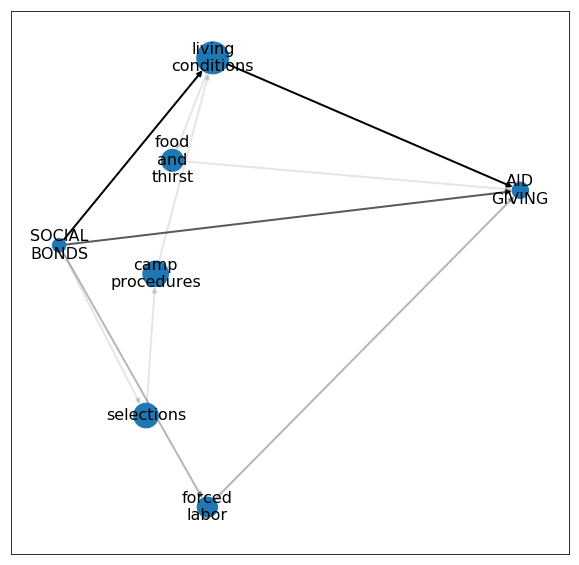

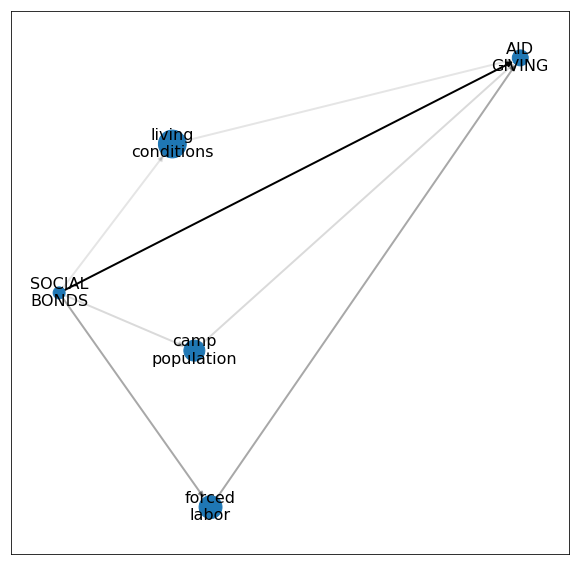

In [136]:
story_start = ['social bonds']
story_end = ['aid giving']
res = visualize_most_important_paths(data_set_1_w,0.2,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m,0.2,features_df,story_start,story_end,None)

## Observation 11

### Qualitative description

Friendship and aid giving are closely connected in narratives of women and they are not closely connected in narratives of men.

friends-selections-aid giving
Women: 5.427121616259672
Men: 0.11639422393786059


friends-aid giving
Women: 1.9789089838040406
Men: 0.4285773765946193


### Quantitative evidence

flux = 1
story_start = 'friends'
story_end = 'aid giving'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

print_paths(flux_w,max_length=3)

print_paths(flux_m,max_length=3)

print_similar_paths(flux_w,flux_m,max_length=3)

### Visualize

flux = 0.15
story_start = ['friends']
story_end = ['aid giving']
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3

The probability that aid giving follow friends and social relations is higher for women.

_msmlags = np.arange(1, 11)

topic_1 = ["friends","social relations"]
topic_2= ['aid giving']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 13

### Qualitative description

In narratives of those men and women who did not work, friendship and survival explanations are more connected for women

### Quantitative evidencw

flux = 0.6
story_start = 'friends'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



print_similar_paths(flux_w,flux_m)


story_start = ['friends']
story_end = ['survival explanations']
flux = 0.2
res = visualize_most_important_paths(data_set_1_w_not_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_not_w,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3

The probability that aid giving follow friends and social relations is higher for women.

_msmlags = np.arange(1, 11)

topic_1 = ["friends","social relations"]
topic_2= ['survival explanations']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 14 A

### Qualitative description

In narratives of those men and women who did not work, social relations and living conditions are much more connected for women:

living conditions - social relations

For women 9.9% of total traffic is going through this path, whereas for men, it is 5.8%.

The following transitionary topics are present both in testimonies of women and men but with different weights:

living conditions-aid giving-social relations <br/>
Women: 1.3274897627391509 <br/>
Men: 0.6744181635044657 <br/>

living conditions-friends-social relations <br/>
Women: 0.8305450841970277 <br/>
Men: 0.522043120093434 <br/>

living conditions-Blockälteste-social relations <br/>
Women: 1.151697967923542 <br/>
Men: 0.751131993867747 <br/>

living conditions-hunger-social relations <br/>
Women: 0.3749064709578037 <br/>
Men: 1.02338128352873 <br/>

### Quantitative evidence

In [137]:
flux = 0.6
story_start = 'living conditions'
story_end = 'social bonds'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



In [138]:
print_similar_paths(flux_w,flux_m)

living conditions-perpetrators-social bonds
Women: 2.5656635215313055
Men: 1.8584961124120822


living conditions-selections-camp procedures-social bonds
Women: 4.765790892775078
Men: 4.553490630356477


living conditions-adaptation methods-social bonds
Women: 2.317190871107951
Men: 3.3855871388105125


living conditions-family-social bonds
Women: 2.870817520071802
Men: 2.785361314150677


living conditions-social bonds
Women: 18.079700821980683
Men: 15.115063072326427


living conditions-camp population-social bonds
Women: 3.351435074872834
Men: 3.5181220076492843


living conditions-food and thirst-social bonds
Women: 8.642154009809305
Men: 8.946919639192789


living conditions-kapos-social bonds
Women: 4.191788075752305
Men: 4.390468005815562


living conditions-aid giving-social bonds
Women: 2.052371125642231
Men: 1.6585034962428902


living conditions-Appell-social bonds
Women: 3.451441022319223
Men: 2.541571205898856


living conditions-mass murder-social bonds
Women: 3.368857482

3 labels to show
3 labels to show


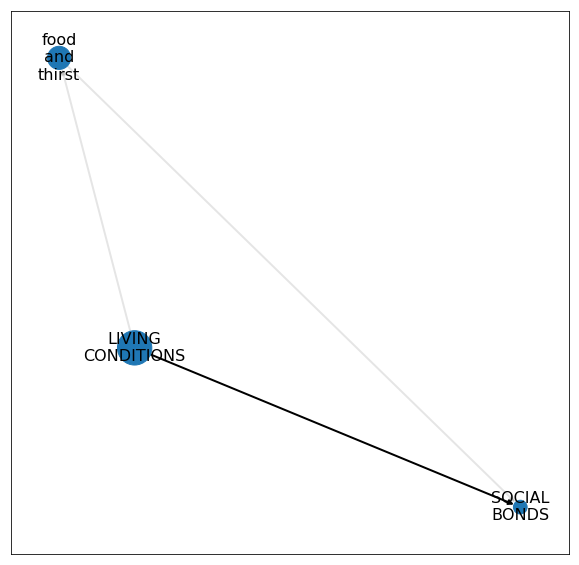

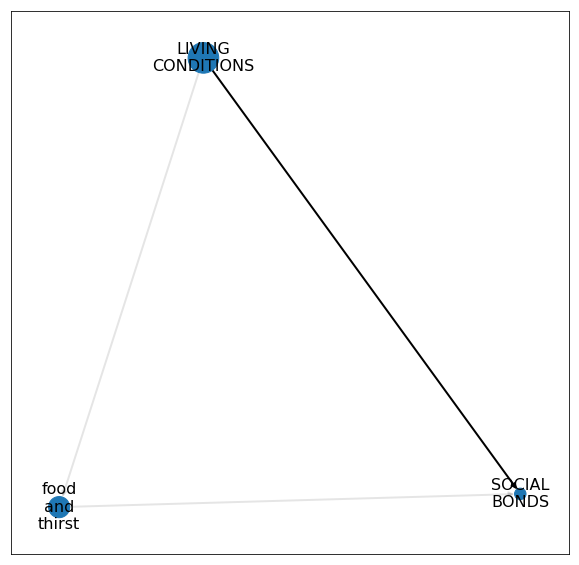

In [139]:

story_start = ['living conditions']
story_end = ['social bonds']
flux = 0.2
res = visualize_most_important_paths(data_set_1_w_not_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_not_w,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3

The probability that friends and social relations follow living conditions is higher for women who did not work.

0
1


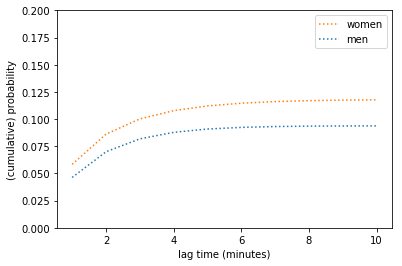

In [140]:
_msmlags = np.arange(1, 11)

topic_2 = ["friends","social bonds"]
topic_1= ['living conditions']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 14

### Qualitative description

In narratives of those men and women who did not work, friendship and living conditions are much more connected for women:

friends-living conditions

For women 6.7% of total traffic is going through this path, whereas for men, it is 1.5%.

In case of women, the main transitionary topics include:


friends-aid giving-living conditions:1.1352997404787295

friends-Blockälteste-living conditions:0.9866599269050341

friends-food-living conditions:2.8081658495238724


### Quantitative evidence

flux = 1
story_start = 'friends'
story_end = 'living conditions'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

print_paths(flux_w,max_length=3)

print_paths(flux_m,max_length=3)

print_similar_paths(flux_w,flux_m)


story_start = ['friends']
story_end = ['living conditions']
flux = 0.2
res = visualize_most_important_paths(data_set_1_w_not_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_not_w,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3


_msmlags = np.arange(1, 11)

topic_1 = topic_map_living_conditions
topic_2= ['friends']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 14 B

### Qualitative description

In narratives of those men and women who did not work, aid giving and living conditions are much more connected for women:

living conditions - aid giving

For women 7.4% of total traffic is going through this path, whereas for men, it is 3.36%.

### Quantitative evidence

In [141]:
flux = 0.3
story_start = 'living conditions'
story_end = 'aid giving'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



In [142]:
print_similar_paths(flux_w,flux_m)

living conditions-kapos-aid giving
Women: 4.068453553221019
Men: 3.6141741546894366


living conditions-aid giving
Women: 12.350459000218525
Men: 10.565457545309735


living conditions-food and thirst-aid giving
Women: 5.813729180250138
Men: 4.134439065432038




### Visualization

5 labels to show
6 labels to show


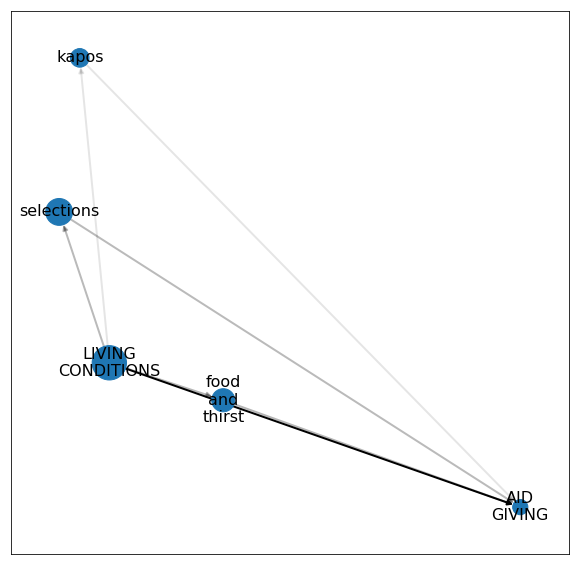

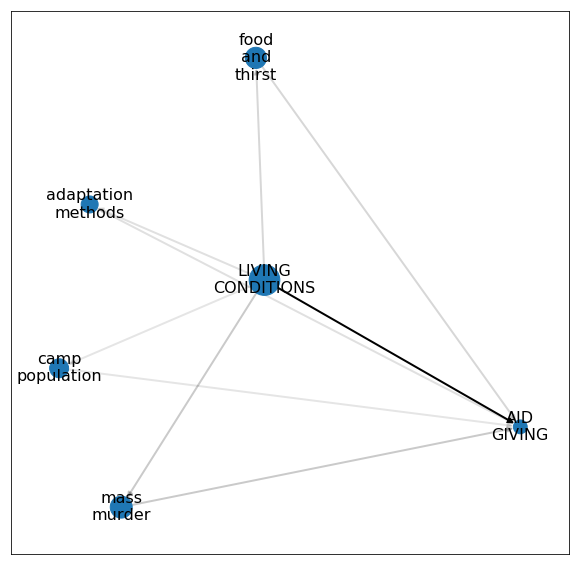

In [143]:
story_start = ['living conditions']
story_end = ['aid giving']
flux = 0.25
res = visualize_most_important_paths(data_set_1_w_not_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_not_w,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3

The probability that aid giving follows living condiions is higher for women.

0
1


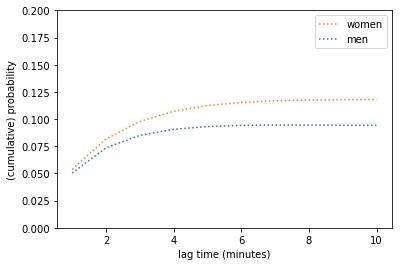

In [144]:




_msmlags = np.arange(1, 11)

topic_1 = topic_map_living_conditions
topic_2= ['aid giving']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 15

### Qualitative description

In narratives of those men and women who did not work, aid giving and survival explanations are much more connected for women:

aid giving-survival explanations


For women 1.8% of total traffic is going through this path, whereas for men, it is 0.7753%.

### Quantitative evidence

In [145]:
flux = 0.8
story_start = 'aid giving'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



In [146]:
print_similar_paths(flux_w,flux_m)

aid giving-perpetrators-survival explanations
Women: 3.893715566890887
Men: 4.906335632085384


aid giving-survival explanations
Women: 2.8883226476896886
Men: 1.2889042369735606




### Visualize it

6 labels to show
7 labels to show


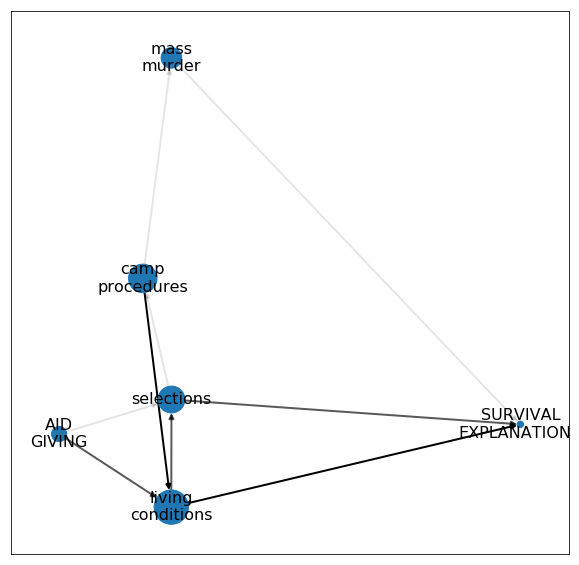

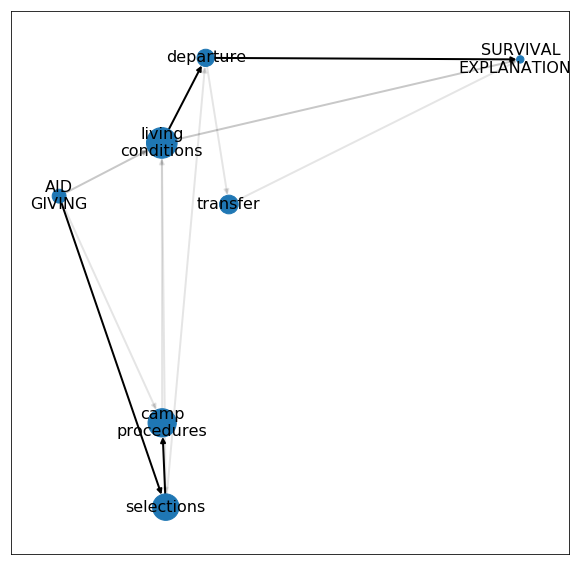

In [147]:
story_start = ['aid giving']
story_end = ['survival explanations']
flux = 0.15
res = visualize_most_important_paths(data_set_1_w_not_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_not_w,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3

0
1


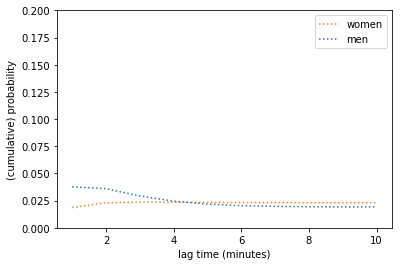

In [148]:




_msmlags = np.arange(1, 11)

topic_2 = ['survival explanations']
topic_1= ['aid giving']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 16

### Qualitative description

In narratives of those men and women who worked, aid giving and survival explanations are  more connected for men:

aid giving-survival explanations


For women 2.6% of total traffic is going through this path, whereas for men, it is 3.39%.

But in case of women, there are a number of short non-directs paths:

aid giving-social relations-survival explanations:1.5957266441234774

aid giving-diseases-survival explanations: 1.2137559365334227

aid giving-friends-survival explanations:0.8478423026431587

aid giving-food-survival explanations:2.105173850686586




### Quantitative evidence

In [149]:
flux = 1
story_start = 'aid giving'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [150]:
print_paths(flux_w,max_length=3)

aid giving-forced labor-survival explanations:7.171622068684368


aid giving-family-survival explanations:3.7570549152279034


aid giving-perpetrators-survival explanations:3.4898376320962874


aid giving-survival explanations:3.2537187878712315


aid giving-adaptation methods-survival explanations:3.2058712068980046


aid giving-social bonds-survival explanations:2.6051640257788353


aid giving-medical care-survival explanations:2.399599545836774


aid giving-kapos-survival explanations:2.3524706672653823


aid giving-food and thirst-survival explanations:2.3333882539528674


aid giving-departure-survival explanations:1.7979299166367397


aid giving-awareness-survival explanations:1.5366928817868846


aid giving-violence-survival explanations:1.0729580229648574


aid giving-killings-survival explanations:1.0190396274507225


aid giving-c-survival explanations:0.8903649390518295


aid giving-preferential treatment-survival explanations:0.7514434071972846


aid giving-attitudes-survival

In [151]:
print_paths(flux_m,max_length=3)

aid giving-survival explanations:8.411713548019481


aid giving-forced labor-survival explanations:5.932363489509364


aid giving-selections-survival explanations:4.995125208203279


aid giving-living conditions-survival explanations:4.85026331886885


aid giving-camp population-survival explanations:4.02500754299069


aid giving-mass murder-survival explanations:2.727916539934472


aid giving-kapos-survival explanations:2.2789555200745744


aid giving-medical care-survival explanations:2.25683490509613


aid giving-killings-survival explanations:1.750359555837705


aid giving-family-survival explanations:1.6931297143269044


aid giving-punishments-survival explanations:1.691254700471567


aid giving-hiding and evasion-survival explanations:1.4070190329130539


aid giving-resistance-survival explanations:1.1521006767791493


aid giving-psychological reactions-survival explanations:1.0303992707166951


aid giving-preferential treatment-survival explanations:0.6208964896608931


aid givi

In [152]:
print_similar_paths(flux_w,flux_m)

aid giving-family-survival explanations
Women: 3.7570549152279034
Men: 1.6931297143269044


aid giving-survival explanations
Women: 3.2537187878712315
Men: 8.411713548019481


aid giving-forced labor-survival explanations
Women: 7.171622068684368
Men: 5.932363489509364


aid giving-medical care-survival explanations
Women: 2.399599545836774
Men: 2.25683490509613


aid giving-cultural activities-survival explanations
Women: 0.6291108841489227
Men: 7.2264641298280314e-06


aid giving-preferential treatment-survival explanations
Women: 0.7514434071972846
Men: 0.6208964896608931


aid giving-kapos-survival explanations
Women: 2.3524706672653823
Men: 2.2789555200745744


aid giving-killings-survival explanations
Women: 1.0190396274507225
Men: 1.750359555837705


aid giving-hiding and evasion-survival explanations
Women: 0.42959463107491797
Men: 1.4070190329130539




### Visualize

9 labels to show
7 labels to show


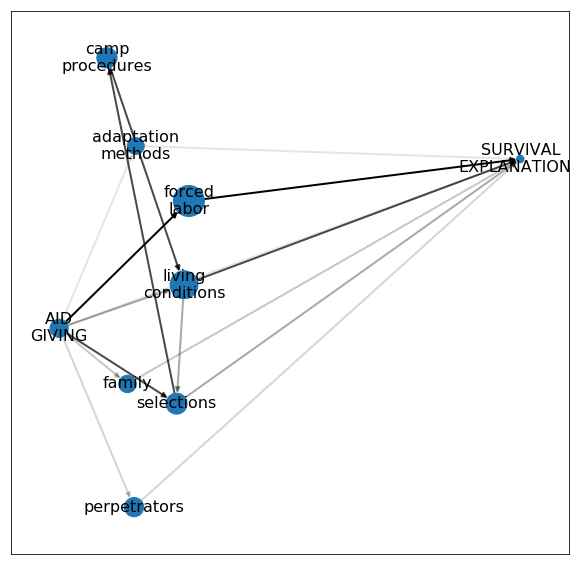

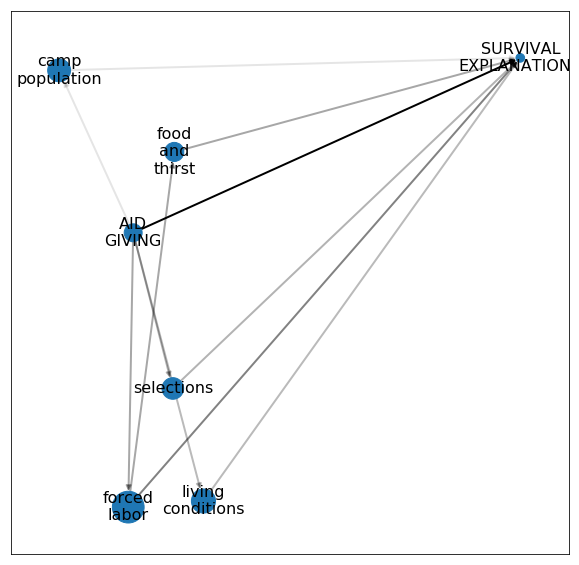

In [153]:

story_start = ['aid giving']
story_end = ['survival explanations']
flux = 0.3
res = visualize_most_important_paths(data_set_1_w_work,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_work,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3

The probability that aid giving follows survival explanations is higher for men.

0
1


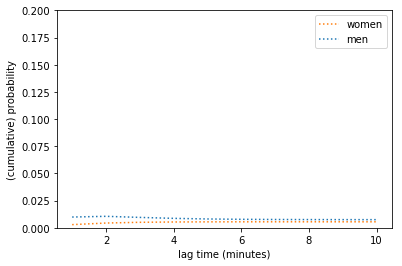

In [154]:




_msmlags = np.arange(1, 11)

topic_1 = ['survival explanations']
topic_2= ['aid giving']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 17

### Qualitative descriptions

In narratives of those men and women who worked, social relations and survival explanations are  more connected for women:

social relations-survival explanations


For women 4.7% of total traffic is going through the path above;  for men 2.5% is going through this path.

A key path with transitory topic for men includes:

social relations-aid giving-survival explanations
2.50368892717799

Key paths with transitory topics for women includes:

social relations-living conditions-survival explanations:2.9110184744683765

social relations-preferential treatment-survival explanations:0.8644349360585929


social relations-friends-survival explanations:0.7264439886153188


### Quantitative evidence

In [155]:
flux = 1
story_start = 'social bonds'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [156]:
print_paths(flux_w,max_length=3)

social bonds-forced labor-survival explanations:7.132455112382886


social bonds-living conditions-survival explanations:5.8644372681731625


social bonds-selections-survival explanations:5.492163205805094


social bonds-survival explanations:4.964669502981802


social bonds-kapos-survival explanations:3.019478421435337


social bonds-adaptation methods-survival explanations:2.76193957176425


social bonds-c-survival explanations:0.8265414968870657


social bonds-testimony sharing-survival explanations:0.3462834993112382


social bonds-arrival-survival explanations:0.1371857160903765


social bonds-transfer-survival explanations:0.12782751721623725




In [157]:
print_paths(flux_m,max_length=3)

social bonds-aid giving-survival explanations:6.984230243220087


social bonds-forced labor-survival explanations:6.037329602442435


social bonds-tattoo-survival explanations:4.411116569012581


social bonds-mass murder-survival explanations:3.569245272154476


social bonds-killings-survival explanations:2.546906723299266


social bonds-warnings-survival explanations:0.044148786859282405




In [158]:
print_similar_paths(flux_w,flux_m)

social bonds-forced labor-survival explanations
Women: 7.132455112382886
Men: 6.037329602442435


social bonds-camp procedures-forced labor-violence-survival explanations
Women: 0.009880580432581068
Men: 0.8428561544302159




### Visualize

5 labels to show
6 labels to show


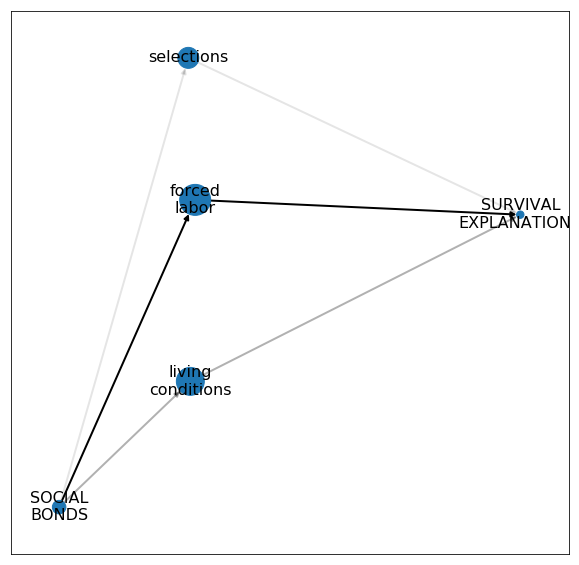

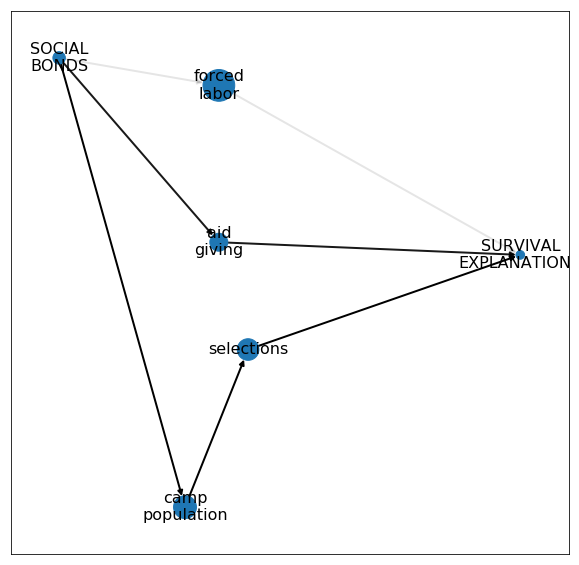

In [159]:

story_start = ['social bonds']
story_end = ['survival explanations']
flux = 0.18
res = visualize_most_important_paths(data_set_1_w_work,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_work,flux,features_df,story_start,story_end,None)

## Observation 18

### Qualitative description

In narratives of those men and women who worked, social relations and forced labor are more connected for men:

social relations-forced labor
Women: 7.786906600083256
Men: 11.051234286602039

forced labor-social relations
Women: 10.931980703238628
Men: 11.027089792748091



### Quantitative evidence

In [160]:
flux = 1
story_start = 'social bonds'
story_end = 'forced labor'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



In [161]:
print_similar_paths(flux_w,flux_m,max_length=2)

social bonds-forced labor
Women: 14.398409348270789
Men: 13.868291971671358




In [162]:
flux = 1
story_start = 'forced labor'
story_end = 'social bonds'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [163]:
print_similar_paths(flux_w,flux_m,max_length=2)

forced labor-social bonds
Women: 10.420124353450248
Men: 14.284675760807804




### Visualize 

3 labels to show
3 labels to show


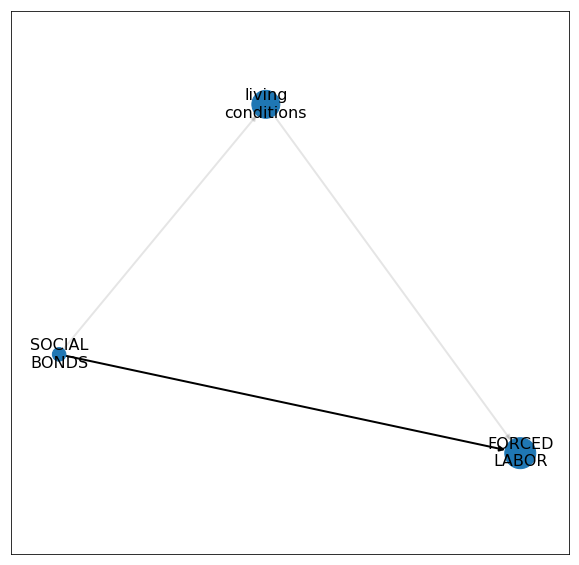

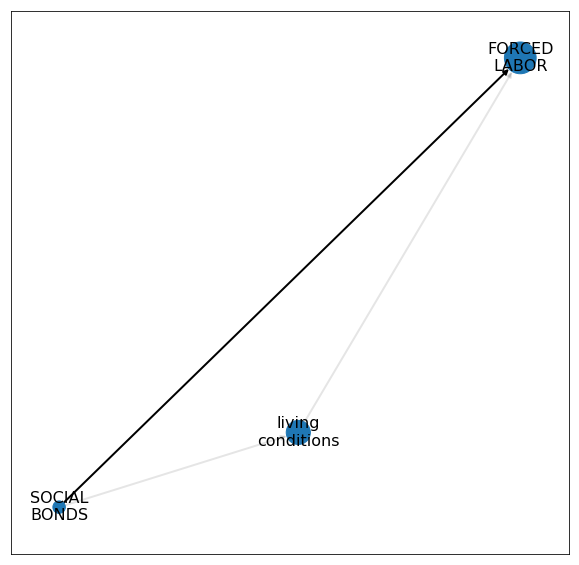

In [164]:

story_start = ['social bonds']
story_end = ['forced labor']
flux = 0.18
res = visualize_most_important_paths(data_set_1_w_work,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_work,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3

0
1


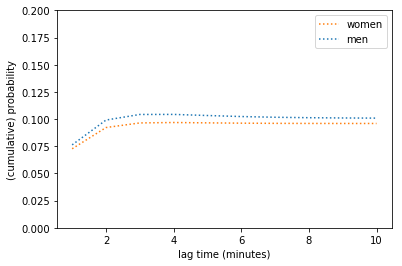

In [165]:




_msmlags = np.arange(1, 11)

topic_1 = ['forced labor']
topic_2= ['social bonds','friends']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 18 B

### Qualitative description

In narratives of those men and women who worked, friends and living conditions are  more connected  for women than for men:

social relations-living conditions


living conditions-friends
Women: 3.499585921266175
Men: 1.665785919545009

### Quantitative evidence

flux = 0.4
story_start = 'living conditions'
story_end = 'friends'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

print_similar_paths(flux_w,flux_m,max_length=3)

### Visualize


story_start = ['friends']
story_end = ['living conditions']
flux = 0.4
res = visualize_most_important_paths(data_set_1_w_work,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_work,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3





_msmlags = np.arange(1, 11)

topic_1 = topic_map_living_conditions
topic_2= ['friends']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 19

### Qualitative description

Forced labor and aid giving are strongly and more or less equally connected for those women and men who worked. Generally, we see a strong connection between forced labor and aid giving.

### Quantitative evidence

In [166]:
flux = 1
story_start = 'forced labor'
story_end = 'aid giving'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [167]:
print_similar_paths(flux_w,flux_m,max_length=2)

forced labor-aid giving
Women: 18.46662405759625
Men: 18.56619088662799




In [168]:
flux = 1
story_start = 'aid giving'
story_end = 'forced labor'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [169]:
print_similar_paths(flux_w,flux_m,max_length=2)

aid giving-forced labor
Women: 12.076654692206532
Men: 15.65547192310598




## Observation 20

### Qualitative description

Living conditions and food sharing are more connected for those women who worked than those men who worked. For instance, for women 6.6% is going through the following paths:

living conditions-food-food sharing

and 3.5% through the following one:

living conditions-food sharing

In testimonies of men, direct path was not found, instead the traffic is going through the following two paths:

living conditions-social relations-food sharing
2 %

living conditions-aid giving-food sharing
1.3 %


### Quantitative evidence

flux = 1
story_start = 'living conditions'
story_end = 'food sharing'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

print_paths(flux_w,max_length=3)

print_paths(flux_m,max_length=3)

print_similar_paths(flux_w,flux_m,max_length=4)

### Quantitative evidence 3





_msmlags = np.arange(1, 11)

topic_1 = ['living conditions']
topic_2= ['food sharing']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 21

### Qualitative description

Forced labor and food sharing are more connected for men who worked than those women who worked. For instance, for women 13.3% is going through the following paths:

forced labor-food sharing

for men it is 22%

In case of aid giving the difference is slighter:

forced labor-aid giving

for women it is 15.965854319863244

and for men it 16.98


### Quantitative evidence

flux = 0.3
story_start = 'forced labor'
story_end = 'food sharing'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

print_similar_paths(flux_w,flux_m,max_length=2)

flux = 0.3
story_start = 'forced labor'
story_end = 'aid giving'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


print_similar_paths(flux_w,flux_m,max_length=2)

### Quantitative evidence 3





_msmlags = np.arange(1, 11)

topic_1 = ['forced labor']
topic_2= ['food sharing']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)





_msmlags = np.arange(1, 11)

topic_1 = ['forced labor']
topic_2= ['aid giving']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 22

### Qualitative description

Those men who did not work are more likely to connect stealing and camp living conditions.

### Quantitative evidence

In [170]:
flux = 0.2
story_start = 'living conditions'
story_end = 'stealing'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [171]:
print_similar_paths(flux_w,flux_m)

living conditions-stealing
Women: 12.237212484228943
Men: 25.481737162178096




In [172]:
flux = 0.2
story_start = 'stealing'
story_end = 'living conditions'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [173]:
print_similar_paths(flux_w,flux_m)

stealing-living conditions
Women: 7.546985142785041
Men: 9.595511120645074




### Quantitative evidence 3

0
1


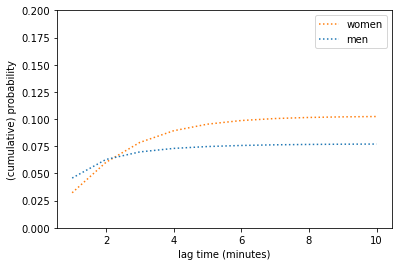

In [174]:




_msmlags = np.arange(1, 11)

topic_1 = ['living conditions']
topic_2= ['stealing']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 23

### Qualitative description

In narratives of women, preferential treatment is more likely to lead to survival explanation.

### Quantitative evidence

In [175]:
flux = 1
story_start = 'preferential treatment'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [176]:
print_paths(flux_w,max_length=2)

preferential treatment-survival explanations:2.3913442092705375




In [177]:
print_paths(flux_m,max_length=2)

preferential treatment-survival explanations:0.2373198553108444




### Quantitative evidence 3

0
1


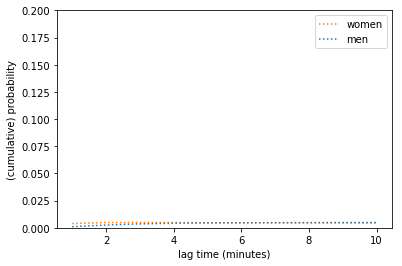

In [178]:




_msmlags = np.arange(1, 11)

topic_1 = ['preferential treatment']
topic_2= ['survival explanations']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 24 A

### Qualitative description

In narratives of women, preferential treatment is more likely to be preceded by living conditions:

living conditions-preferential treatment
Women: 3.267726057364454
Men: 1.9161261348630667



### Quantitative evidence

In [179]:
flux = 1
story_start = 'living conditions'
story_end = 'preferential treatment'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [180]:
print_similar_paths(flux_w,flux_m)

living conditions-killings-preferential treatment
Women: 0.4594543064509355
Men: 0.9724223624281688


living conditions-psychological reactions-preferential treatment
Women: 0.7400622947362503
Men: 0.5386148363590147


living conditions-mass murder-preferential treatment
Women: 2.058413346904093
Men: 5.424860688064741


living conditions-kapos-preferential treatment
Women: 5.800376770386856
Men: 7.261711280896144


living conditions-attitudes-preferential treatment
Women: 0.11939167932654382
Men: 0.18685591173056892


living conditions-forced labor-preferential treatment
Women: 6.101964557973688
Men: 6.773451740696275


living conditions-language skills-preferential treatment
Women: 0.056959328253477756
Men: 0.15049781551369898


living conditions-adaptation methods-preferential treatment
Women: 2.88129065027728
Men: 3.4189521164442502


living conditions-humiliation-preferential treatment
Women: 0.27906160122030027
Men: 0.4292960195375447


living conditions-departure-preferential tre

### Quantitative evidence 3

0
1


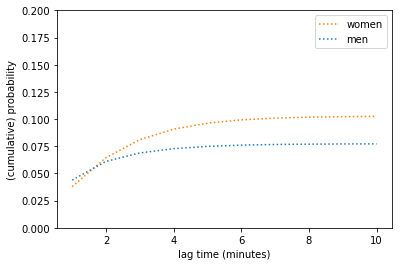

In [181]:




_msmlags = np.arange(1, 11)

topic_1 = ['living conditions']
topic_2= ['preferential treatment']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 24

### Qualitative description

In narratives of women, Blockalteste is more connected to survival explanations;

Blockälteste-survival explanations
Women: 1.5644480047580056
Men: 0.8118622824526782

### Quantitative evidence

flux = 1
story_start = 'Blockälteste'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

print_paths(flux_w,max_length=3)

print_paths(flux_m,max_length=3)

print_similar_paths(flux_w,flux_m)

### Quantitative evidence 3





_msmlags = np.arange(1, 11)

topic_2 = ['survival explanations']
topic_1= ['Blockälteste']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)